In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "youtubetrendvideos"

# Loading Required Libraries

In [29]:
# Load the tidyverse library, which includes several packages for data manipulation and visualization
library(tidyverse) 

# Load ggplot2, a popular package for creating data visualizations
library(ggplot2)
library(gridExtra)

# Load corrplot, which provides functions for creating correlation matrices and plots
library(corrplot)

# Load cowplot and gridExtra, which are packages for arranging and combining multiple plots
library(cowplot)
library(gridExtra)

# Load DataExplorer, which provides functions for exploring and summarizing data
library(DataExplorer)

# Load skimr, which provides summary statistics for data frames and matrices
library(skimr)

# Load tm and SnowballC, which are packages for text mining and natural language processing
library(tm)
library(SnowballC)

# Load tidytext and stringr, which provide tools for working with text data
library(tidytext)
library(stringr)

# Load dplyr and lubridate, which provide tools for data manipulation and working with dates and times
library(dplyr)
library(lubridate)


> Load Data

In [49]:
# Read in YouTube trending videos data from CSV files for multiple countries

India.data <- read_csv("/kaggle/input/youtubetrendvideos/INvideos.csv",show_col_type =FALSE)
Japan.data <- read_csv("/kaggle/input/youtubetrendvideos/JPvideos.csv", show_col_type =FALSE)
Mexico.data <- read_csv("/kaggle/input/youtubetrendvideos/MXvideos.csv", show_col_type =FALSE)
France.data <- read_csv("/kaggle/input/youtubetrendvideos/FRvideos.csv", show_col_type =FALSE)
Russia.data <- read_csv("/kaggle/input/youtubetrendvideos/RUvideos.csv", show_col_type =FALSE)
US.data <- read_csv("/kaggle/input/youtubetrendvideos/USvideos.csv", show_col_type =FALSE)
GB.data <- read_csv("/kaggle/input/youtubetrendvideos/GBvideos.csv", show_col_type =FALSE)
Cannada.data <- read_csv("/kaggle/input/youtubetrendvideos/DEvideos.csv", show_col_type =FALSE)
Germany.data <- read_csv("/kaggle/input/youtubetrendvideos/CAvideos.csv", show_col_type =FALSE)

> basic descriptive analysis

In [ ]:
# Define a function to extract the dataset information
get_dataset_info <- function(dataset) {
  info <- list()
  info$dim <- dim(dataset)
  # info$head <- head(dataset)
  # info$str <- capture.output(str(dataset))
  info$summary <- summary(dataset)
  return(info)
}

# Apply the function to all datasets and store the results in a list
India.info<-get_dataset_info(India.data)
Japan.info<-get_dataset_info(Japan.data)
Mexico.info<-get_dataset_info(Mexico.data)
France.info<-get_dataset_info(France.data)
Russia.info<-get_dataset_info(Russia.data)
US.info<-get_dataset_info(US.data)
GB.info<-get_dataset_info(GB.data)
Canada.info<-get_dataset_info(Cannada.data)
Germany.info<-get_dataset_info(Germany.data)

In [ ]:
# stroing it in single list
info_list <- list(
India.info,
Japan.info,
Mexico.info,
France.info,
Russia.info,
US.info,
GB.info,
Canada.info,
Germany.info
)

# extract it in text format
write.table(info_list, file = "country_info_list.txt")

In [ ]:
colnames(India.data)
colnames(Germany.data)

Exploring Dataset

In [ ]:
head(info_list)

In [4]:
# Variables presents in Dataset
colnames(India.data)
colnames(Japan.data)
colnames(Mexico.data)
colnames(France.data)
colnames(Russia.data)
colnames(US.data)
colnames(GB.data)
colnames(Cannada.data)
colnames(Germany.data)

# here we found that every dataset have similar variables..

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

Exploration on data for distribution of variable

In [5]:
# Complete Summary
apply_skim <- function(data) {
  skim(data)
}

India.summary <- apply_skim(India.data)
Japan.summary <- apply_skim(Japan.data)
Mexico.summary <- apply_skim(Mexico.data)
Russia.summary <- apply_skim(Russia.data)
France.summary <- apply_skim(France.data)
US.summary <- apply_skim(US.data)
GB.summary <- apply_skim(GB.data)
Canada.summary <- apply_skim(Cannada.data)
Germany.summary <- apply_skim(Germany.data)

In [ ]:
#Store it in sigle list
summary_list <- list(
India.summary,
Japan.summary,
Mexico.summary,
France.summary,
Russia.summary,
US.summary,
GB.summary,
Canada.summary,
Germany.summary
)

# extract it in text format
write.table(summary_list, file = "country_summary_list.txt")

In [ ]:
head(summary_list)

In [6]:
# Checking for missing values

check_missing_values_all <- function() {
  countries <- c("India", "Japan", "Mexico", "France", "Russia", "US", "GB", "Cannada", "Germany")
  for (country in countries) {
    data <- get(paste(country, ".data", sep=""))
    missing_values <- is.na(data)
    missing_counts <- colSums(missing_values)
    print(paste("Missing values in", country, "dataset:"))
    print(missing_counts)
  }
}

# function call
check_missing_values_all()

[1] "Missing values in India dataset:"
              video_id          trending_date                  title 
                     0                      0                      0 
         channel_title            category_id           publish_time 
                     0                      0                      0 
                  tags                  views                  likes 
                     0                      0                      0 
              dislikes          comment_count         thumbnail_link 
                     0                      0                      0 
     comments_disabled       ratings_disabled video_error_or_removed 
                     0                      0                      0 
           description 
                   561 
[1] "Missing values in Japan dataset:"
              video_id          trending_date                  title 
                     0                      0                      0 
         channel_title            

# Preprocessing
After completing basic exploration and understanding different aspects of data , our next step is to perform Preprocessing include removing null values , creating new values handling outliers etc 

In [77]:
# as we found that Every coutry have some missing values count for discription variable, there are two ways either we drop the entire coloumn or we can impute some default vlaues

# in our case description is not a significant analysis variable so we can simply provide a default text in place of missing

fix_missing_description <- function(data) {
  data$description[is.na(data$description)] <- "No description available"
  return(data)
}

India.data <- fix_missing_description(India.data)
Japan.data <- fix_missing_description(Japan.data)
Mexico.data <- fix_missing_description(Mexico.data)
France.data <- fix_missing_description(France.data)
Russia.data <- fix_missing_description(Russia.data)
US.data <- fix_missing_description(US.data)
GB.data <- fix_missing_description(GB.data)
Cannada.data <- fix_missing_description(Cannada.data)
Germany.data <- fix_missing_description(Germany.data)

In [78]:
# Again we check for missing

# Checking for missing values

check_missing_values_all <- function() {
  countries <- c("India", "Japan", "Mexico", "France", "Russia", "US", "GB", "Cannada", "Germany")
  for (country in countries) {
    data <- get(paste(country, ".data", sep=""))
    missing_values <- sum(is.na(data$description))
      print(missing_values)
  }
}

# function call
check_missing_values_all()

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


In [79]:
# Extracting Title length
GB.data$title_length =sapply(GB.data$title, nchar)
India.data$title_length =sapply(India.data$title, nchar)
France.data$title_length =sapply(France.data$title, nchar)
US.data$title_length =sapply(US.data$title, nchar)
Japan.data$title_length =sapply(Japan.data$title, nchar)
Germany.data$title_length =sapply(Germany.data$title, nchar)
Russia.data$title_length =sapply(Russia.data$title, nchar)
Mexico.data$title_length =sapply(Mexico.data$title, nchar)
Cannada.data$title_length =sapply(Cannada.data$title,nchar)

In [10]:
# check for new Variables presents in Dataset
colnames(India.data)
colnames(Japan.data)
colnames(Mexico.data)
colnames(France.data)
colnames(Russia.data)
colnames(US.data)
colnames(GB.data)
colnames(Cannada.data)
colnames(Germany.data)

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"            "title_length"

# Some important Preprocessing steps can be done now which includes

> 1. Data Type Conversion: Convert variables such as trending_date, publish_time to the appropriate date/time format. Similarly, you can convert variables such as category_id to a factor variable instead of numeric.

> 2. Cleaning Text Data: Variables such as title, channel_title, tags, and description may contain text data that needs to be cleaned. Common preprocessing steps for text data include removing special characters, punctuation, and stop words, as well as converting all text to lowercase.

> 3. Handling Missing Values: Identify and handle any missing values in your dataset. You can either remove rows with missing values, impute missing values, or replace them with appropriate values.

> 4. Scaling Numeric Variables: Normalize and scale numeric variables such as views, likes, dislikes, and comment_count to ensure that they are on a similar scale. This can help prevent certain variables from dominating others in your analysis.

> 5. Feature Engineering: Create new features from existing variables that may be relevant for your analysis. For example, you could create a new variable for the length of the video title or description, or extract features such as the hour of day or day of week that a video was published.

In [11]:
# data Type conversion

convert_datetime_vars <- function(data) {
  # Convert trending_date and publish_time to date/time format
  data$trending_date <- as.POSIXct(data$trending_date, format = "%y.%d.%m")
  data$publish_time <- as.POSIXct(data$publish_time, format = "%Y-%m-%dT%H:%M:%S.%z")
  
  # Return the modified dataset
  return(data)
}

# Apply the function to all countries' datasets
India.data <- convert_datetime_vars(India.data)
Japan.data <- convert_datetime_vars(Japan.data)
Mexico.data <- convert_datetime_vars(Mexico.data)
France.data <- convert_datetime_vars(France.data)
Russia.data <- convert_datetime_vars(Russia.data)
US.data <- convert_datetime_vars(US.data)
GB.data <- convert_datetime_vars(GB.data)
Cannada.data <- convert_datetime_vars(Cannada.data)
Germany.data <- convert_datetime_vars(Germany.data)

In [12]:
#checking for changes in random
head(India.data)
head(Cannada.data)

video_id    trending_date
1 kzwfHumJyYc 2017-11-14   
2 zUZ1z7FwLc8 2017-11-14   
3 10L1hZ9qa58 2017-11-14   
4 N1vE8iiEg64 2017-11-14   
5 kJzGH0PVQHQ 2017-11-14   
6 il_pSa5l98w 2017-11-14   
  title                                                                                      
1 Sharry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November          
2 पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दंग रह जायेंगे                                         
3 Stylish Star Allu Arjun @ ChaySam Wedding Reception | TFPC                                 
4 Eruma Saani | Tamil vs English                                                             
5 why Samantha became EMOTIONAL @ Samantha naga chaithanya marriage Reception | Filmylooks   
6 MCA (Middle Class Abbayi) TEASER - Nani,Sai Pallavi, Dil Raju, Devi Sri Prasad, Sriram Venu
  channel_title   category_id publish_time       
1 Lokdhun Punjabi  1          2017-11-12 12:20:39
2 HJ NEWS         25          2017-11-13 05:43:56
3 TFPC            24          2017-11-12 15:48:08
4 Eruma Saani     23          2017-11-12 07:08:48
5 Filmylooks      24          2017-11-13 01:14:16
6 Dil Raju        24          2017-11-10 04:29:50
  tags                                                                                                                                                                                                                                                                                                                                                                                      
1 sharry mann|"sharry mann new song"|"sharry mann cute munda"|"sharry mann latest song"|"sharry mann punjabi song 2017"|"parmish verma"|"parmish verma new song"|"parmish verma sharry mann"|"parmish verma sharry mann new song"|"parmish verma cute munda"|"new punjabi song 2017"|"punjabi song 2017"|"parmish verma new song 2017"|"parmish verma latest song 2017"|"punjabi songs 2017"
2 पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर दंग रह जायेंगे"|"latest news"|"today news"|"news"|"breaking news"|"current news"|"world news"|"hj news updates"|"bollywood updates"|"news channel in hindi"|"entertainment news"|"merrage"|"love"|"break up"|"perideus time"|"pragenent girl"|"baby born"                                                                                            
3 Stylish Star Allu Arjun @ ChaySam Wedding Reception|"Stylish Star Allu Arjun"|"ChaySam Wedding Reception"|"nagachaitanya"|"samantha"|"chaysam"|"chay sam"|"naga chaitanya and samantha wedding reception"|"wedding reception"|"nagarjuna"|"akkineni wedding reception"|"tfpc"|"telugu cinema"|"celebrities @ chaysam wedding reception"                                                   
4 Eruma Saani|"Tamil Comedy Videos"|"Films"|"Movies"|"Harija"|"Short"|"Film"|"Eruma Sani"|"Eruma Saani Videos"|"Eruma Saani Short Film"|"Eruma Saani Comedy"|"Eruma Saani Harija"|"Eruma Saani Tamil vs English"|"Tamil vs English"|"Tamil"|"English"|"Hindi"|"TTV Dinakaran"|"Sasikala"|"Sasikala income tax raid"                                                                         
5 Filmylooks|"latest news"|"telugu movies"|"telugu news"|"Tollywood news"|"why Samantha became EMOTIONAL @ Samantha naga chaithanya marriage Reception"|"why Samantha became EMOTIONAL"|"samantha emotional moment"|"ChaySam Wedding Reception video"|"Naga Chaitanya and Samantha Wedding Reception LIVE"|"samantha ruth prabhu"                                                           
6 Nenu Local|"Nenu Local Telugu Movie"|"Nani"|"Sai Pallavi"|"Dil Raju"|"Devi Sri Prasad"|"Telugu Latest Movies"|"Telugu Full Movies"|"Telugu Comedy Movies"|"Nani Trailer"|"Nani Movies"|"MCA MOVIE"|"Middle Class Abbayi"|"MCA"|"MCA - Middle class abbayi"|"Fidaa"|"Nani MCA"|"MCA Trailer"|"MCA Teaser"|"MCA First Look"|"Nani MCA Teaser"|"Nani MCA Trailer"                            
  views   likes dislikes comment_count
1 1096327 33966  798      882         
2  590101   735  904        0        

video_id    trending_date
1 LgVi6y5QIjM 2017-11-14   
2 Bayt7uQith4 2017-11-14   
3 1ZAPwfrtAFY 2017-11-14   
4 AHtypnRk7JE 2017-11-14   
5 ZJ9We4bjcg0 2017-11-14   
6 xapGFgWqtg4 2017-11-14   
  title                                                                               
1 Sing zu Ende! | Gesangseinlagen vom Feinsten | inscope21                            
2 Kinder ferngesteuert im Kiosk! Erwachsene abzocken - LUKE! Die Woche und ich | SAT.1
3 The Trump Presidency: Last Week Tonight with John Oliver (HBO)                      
4 Das Fermi-Paradoxon                                                                 
5 18 SONGS mit Kelly MissesVlog (Sing-off)                                            
6 Geld verdienen mit Online-Umfragen? Geht das wirklich? 😱                           
  channel_title           category_id publish_time       
1 inscope21               24          2017-11-13 17:08:49
2 LUKE! Die Woche und ich 23          2017-11-12 22:30:01
3 LastWeekTonight         24          2017-11-13 07:30:00
4 100SekundenPhysik       27          2017-11-12 15:00:01
5 rezo                    24          2017-11-12 13:10:36
6 Die Allestester         22          2017-11-13 01:49:24
  tags                                                                                                                                                                                                                                                                                                                                                                        
1 inscope21|sing zu ende|gesangseinlagen|gesang|gesungen|songs nachsingen|nachsingen|songs covern|carpool karaoke|witziger gesang|rap|rap cover|rap zu ende|raps nachstellen|nachrappen|nach rappen                                                                                                                                                                           
2 Kinder|ferngesteuert|Kinder ferngesteuert|luke mockridge kinder|luke die woche und ich kinder|Prank|verarschen|Kiosk|Funkgerät|Falschgeld|Verkäufer|Luke Mockridge|Luke Die Woche und ich|versteckte Kamera|Show|Sat.1|LDWUI|Comedy|Kioskverkäufer|kinder prank|luke robin|Erwachsene abzocken|kunden verarschen|kunden prank|kasse prank|versteckte Kamera luke|luke kinder
3 last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump                                                                                                                                                                                                                                                                            
4 Physik|Wissenschaft|Technik|Science-Fiction|Außerirdische|Alien|Aliens|Fermi|Fermi-Paradoxon                                                                                                                                                                                                                                                                                
5 kelly|missesvlog|kelly song|bausa|bausa was du liebe nennst                                                                                                                                                                                                                                                                                                                 
6 [none]                                                                                                                                                                                                                                                                                                                                                                      
  views   likes  dislikes comment_count
1  252786  35885  230      1539        
2  797196  53576  302      1278        
3 2418783  97190 6146     12703        
4  380247  31821  458      1955        
5  822213 100684 2467  

In [13]:
# Cleaning Text Data

clean_text_data <- function(data, cols_to_clean) {
  
  # convert the specified columns to character type
  data[, cols_to_clean] <- lapply(data[, cols_to_clean], as.character)
  
  # remove special characters and punctuation
  data[, cols_to_clean] <- lapply(data[, cols_to_clean], function(x) str_replace_all(x, "[^[:alnum:][:space:]]", ""))
  data[, cols_to_clean] <- lapply(data[, cols_to_clean], function(x) str_replace_all(x, "\\b(\\w+)(\\W+\\1\\b)+", "\\1"))
  
  # convert text to lowercase
  data[, cols_to_clean] <- lapply(data[, cols_to_clean], function(x) str_to_lower(x))
  
  # remove stop words
  data[, cols_to_clean] <- lapply(data[, cols_to_clean], function(x) x %>% 
                                     as.character() %>% 
                                     str_split(" ") %>% 
                                     unlist() %>% 
                                     setdiff(stop_words$word) %>% 
                                     paste(collapse = " "))
  
  return(data)
}
                                  
cols_to_clean <- c("title", "channel_title", "tags", "description")

India.data <- clean_text_data(India.data, cols_to_clean)
Japan.data <- clean_text_data(Japan.data, cols_to_clean)
Mexico.data <- clean_text_data(Mexico.data, cols_to_clean)
France.data <- clean_text_data(France.data, cols_to_clean)
Russia.data <- clean_text_data(Russia.data, cols_to_clean)
US.data <- clean_text_data(US.data, cols_to_clean)
GB.data <- clean_text_data(GB.data, cols_to_clean)
Cannada.data <- clean_text_data(Cannada.data, cols_to_clean)
Germany.data <- clean_text_data(Germany.data, cols_to_clean)

In [16]:
# check for changes

head(India.data$tags[1])

# so we had removed all the punctutaion and stopword

[1] "sharry mannsharry mann songsharry cute mundasharry punjabi song 2017parmish vermaparmish verma songparmish mannparmish mundanew 2017punjabi songs 2017 पीरियडस के समयपेट पर पति करता ऐसादेखकर दंग रह जायेंगेlatest newstoday newsnewsbreaking newscurrent newsworld newshj news updatesbollywood updatesnews channel hindientertainment newsmerragelovebreak upperideus timepragenent girlbaby born stylish star allu arjun  chaysam wedding receptionstylish arjunchaysam receptionnagachaitanyasamanthachaysamchay samnaga chaitanya samantha receptionwedding receptionnagarjunaakkineni receptiontfpctelugu cinemacelebrities reception eruma saanitamil comedy videosfilmsmoviesharijashortfilmeruma sanieruma saani videoseruma short filmeruma comedyeruma harijaeruma tamil englishtamil englishtamilenglishhindittv dinakaransasikalasasikala income tax raid filmylookslatest newstelugu moviestelugu newstollywood newswhy emotional naga chaithanya marriage receptionwhy emotionalsamantha momentchaysam videonaga livesamantha ruth prabhu nenu localnenu local telugu movienanisai pallavidil rajudevi sri prasadtelugu moviesnani trailernani moviesmca moviemiddle class abbayimcamca middle abbayifidaanani mcamca trailermca teasermca looknani mca teasernani trailer songspunjabi bhangrapunjabi musicpunjabi bhangra romantic sad songspunjabibhangralatest 2017punjabdesispeed recordsmankirt songdaangsukh sangheradeep kahlonmankirt aulakh ek dil jaan video songek jaanek videopadmavatipadmavati songspadmavati movie songdeepika padukoneranveer singhghoomarpadmavati padukoneshahid kapoorsanjay leela bhansalipadmavati deepika padukoneghoomarghoomar padukonepadmavati songsnew hindi songshindi songsshahid bhansaliindian songslove songlove 2017do chiranjeevi chaitanyasamantha akkineninagvenkateshmegastar chiranjeevimegastar receptionchiranjeevi receptionnaga akkineni livenaga chaitanyasamanthanaga samanthanagarjunachaisamreception liveakkineni rama charannaga receptionakkineni familydaggubati familyreception jump cutsjumpcutstamil comedytamil videosnew bike bikejumpcuts realitythe realitybike scenario jumpcutsjumpcuts storyhari baskar videoshari jumpcutshari videotamil viral videosviral videostrending videosjumpcuts trending videosswathi videoskaghsjumpcuts newjumpcuts comedyjumpcuts youtube channelhot story jumpcutshot hina khanhina khan bigg bossbigg boss 11big 11 evictionbb 11bigg season episodetellymasalatelly masalatelly masala interviewtelly bossmehjabisiddiquimahjabi siddiqui interviewmehjabi revealshina 11telly masalatellymasala bosstelly interviewbigg episode aatish 2017latest aatishnew jannatlatest jannatnew aatishlatest aatishaatishpunjabi aatishpunjabi music videos aatishjannat 2017new songslatest songssongs 2017punjabiaatish songsjannat songwhte hillaatish taareromantic resnu desaiactress renu desaipawan kalyan wife exwife desaiabn desai interviewrenu heart rkrenu rates pawan kalyanrenu 10 pawanrenu husbandrenu interviewrk interview desairenu rkabnabn teluguabn newsabn andhrajyothyabn andhrajyothirenu heartrenu commentson pawa kalaynarenu interivew voice indiatvoithe india kidsauditionsingerssinging talentkids voicekids singingkids talenttalpa mediaandtvtv rowi nanadha virenderprabh grewallatest 2017best 2017brand songspunjabisongsnewlatestrowinanadhabirenderparmish vermaparmishpunjabi love songsad songbest songsbest week nextgensasikalasasikala natarajanaiadmktamil nadujayalalithaajayalalithatamil newsapollo hospitalsasikala pushpait raidsasikala familyincome raidlatest newslatest newspoliticstamil todayopstamilnaduadmkyoutubenews tamiltamil nadu cmtamilvivekvivek jayaramjayalalitha uyilapollo cd types students elvish yadavelvish yadav videoelvish vineselvish videosstudents videotypes classomprakash songsot lagani haielvis vines tiger zinda hai trailertiger official teasertiger trailertrailer haisalman songsalman trailerbollywood trailerhindi trailersalman 2017most viewed trailerofficial 2017salman katrina moviesalman 20172017 bollywood hailatest khankatrina kaifv

In [50]:
#Scaling Values

# Function to scale numeric variables in a data frame
scale_numeric_vars <- function(data) {
  # Identify numeric variables
  numeric_vars <- sapply(data, is.numeric)
  
  # Scale numeric variables
  scaled_vars <- lapply(data[, numeric_vars], scale)
  
  # Replace original numeric variables with scaled variables in data frame
  data[, numeric_vars] <- scaled_vars
  
  # Return scaled data frame
  return(data)
}

India_scaled.data <- scale_numeric_vars(India.data)
Japan_scaled.data <- scale_numeric_vars(Japan.data)
Mexico_scaled.data <- scale_numeric_vars(Mexico.data)
France_scaled.data<- scale_numeric_vars(France.data)
Russia_scaled.data<- scale_numeric_vars(Russia.data)
US_scaled.data <- scale_numeric_vars(US.data)
GB_scaled.data <- scale_numeric_vars(GB.data)
Cannada_scaled.data <- scale_numeric_vars(Cannada.data)
Germany_scaled.data <- scale_numeric_vars(Germany.data)

In [52]:
# check for changes

#checking for numeric variables in data
sapply(India_scaled.data,is.numeric)

head(Cannada_scaled.data)

video_id          trending_date                  title 
                 FALSE                  FALSE                  FALSE 
         channel_title            category_id           publish_time 
                 FALSE                   TRUE                  FALSE 
                  tags                  views                  likes 
                 FALSE                   TRUE                   TRUE 
              dislikes          comment_count         thumbnail_link 
                  TRUE                   TRUE                  FALSE 
     comments_disabled       ratings_disabled video_error_or_removed 
                 FALSE                  FALSE                  FALSE 
           description 
                 FALSE

video_id    trending_date
1 LgVi6y5QIjM 17.14.11     
2 Bayt7uQith4 17.14.11     
3 1ZAPwfrtAFY 17.14.11     
4 AHtypnRk7JE 17.14.11     
5 ZJ9We4bjcg0 17.14.11     
6 xapGFgWqtg4 17.14.11     
  title                                                                               
1 Sing zu Ende! | Gesangseinlagen vom Feinsten | inscope21                            
2 Kinder ferngesteuert im Kiosk! Erwachsene abzocken - LUKE! Die Woche und ich | SAT.1
3 The Trump Presidency: Last Week Tonight with John Oliver (HBO)                      
4 Das Fermi-Paradoxon                                                                 
5 18 SONGS mit Kelly MissesVlog (Sing-off)                                            
6 Geld verdienen mit Online-Umfragen? Geht das wirklich? 😱                           
  channel_title           category_id publish_time       
1 inscope21               0.4722278   2017-11-13 17:08:49
2 LUKE! Die Woche und ich 0.3288753   2017-11-12 22:30:01
3 LastWeekTonight         0.4722278   2017-11-13 07:30:00
4 100SekundenPhysik       0.9022852   2017-11-12 15:00:01
5 rezo                    0.4722278   2017-11-12 13:10:36
6 Die Allestester         0.1855228   2017-11-13 01:49:24
  tags                                                                                                                                                                                                                                                                                                                                                                        
1 inscope21|sing zu ende|gesangseinlagen|gesang|gesungen|songs nachsingen|nachsingen|songs covern|carpool karaoke|witziger gesang|rap|rap cover|rap zu ende|raps nachstellen|nachrappen|nach rappen                                                                                                                                                                           
2 Kinder|ferngesteuert|Kinder ferngesteuert|luke mockridge kinder|luke die woche und ich kinder|Prank|verarschen|Kiosk|Funkgerät|Falschgeld|Verkäufer|Luke Mockridge|Luke Die Woche und ich|versteckte Kamera|Show|Sat.1|LDWUI|Comedy|Kioskverkäufer|kinder prank|luke robin|Erwachsene abzocken|kunden verarschen|kunden prank|kasse prank|versteckte Kamera luke|luke kinder
3 last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump                                                                                                                                                                                                                                                                            
4 Physik|Wissenschaft|Technik|Science-Fiction|Außerirdische|Alien|Aliens|Fermi|Fermi-Paradoxon                                                                                                                                                                                                                                                                                
5 kelly|missesvlog|kelly song|bausa|bausa was du liebe nennst                                                                                                                                                                                                                                                                                                                 
6 [none]                                                                                                                                                                                                                                                                                                                                                                      
  views       likes       dislikes    comment_count
1 -0.14928688  0.13761785 -0.08006484 -0.07142022  
2  0.08247925  0.31139978 -0.07512568 -0.08637035  
3  0.77282097  0.73982808  0.32576930  0.56805617  
4 -0.09502420  

In [53]:
# feature engineering

create_new_variables <- function(data) {
  data$like_ratio <- data$likes / data$views
    
  # assume publish_time is in a datetime format
  data$hour_of_day <- hour(data$publish_time)
  data$day_of_week <- wday(data$publish_time, label = TRUE)
  
    return(data)
}

India.data <- create_new_variables(India.data)
Japan.data <- create_new_variables(Japan.data)
Mexico.data <- create_new_variables(Mexico.data)
France.data <- create_new_variables(France.data)
Russia.data <- create_new_variables(Russia.data)
US.data <- create_new_variables(US.data)
GB.data <- create_new_variables(GB.data)
Cannada.data <- create_new_variables(Cannada.data)
Germany.data <- create_new_variables(Germany.data)

In [20]:
head(Germany.data)

# Exploratory Data Analysis

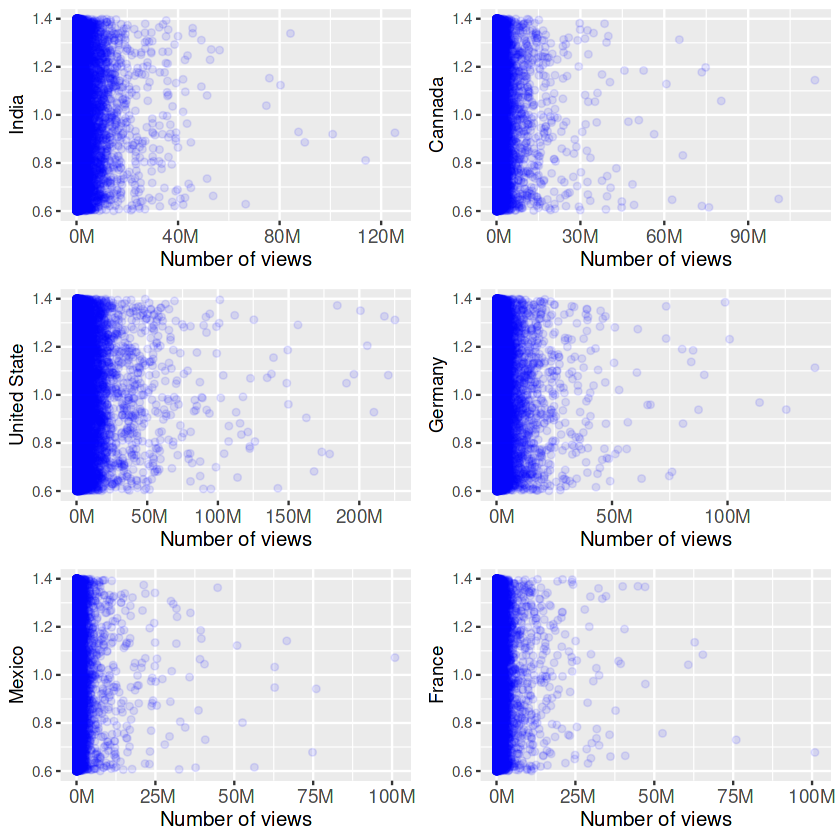

In [61]:

x1 <- ggplot(India.data, aes(x = views, y=1)) +
  geom_jitter(alpha = 0.1, color = "blue") +
  labs(x = "Number of views",y="India") +
  theme(axis.text.x = element_text(size = 11), 
        axis.title.x = element_text(size = 12)) +
  scale_x_continuous(labels = function(x) paste0(format(x/1e6, scientific = FALSE), "M"))
                     
x2 <- ggplot(Cannada.data, aes(x = views, y=1)) +
  geom_jitter(alpha = 0.1, color = "blue") +
  labs(x = "Number of views",y="Cannada") +
  theme(axis.text.x = element_text(size = 11), 
        axis.title.x = element_text(size = 12)) +
  scale_x_continuous(labels = function(x) paste0(format(x/1e6, scientific = FALSE), "M"))
                     
                     
                     
x3 <- ggplot(US.data, aes(x = views, y=1)) +
  geom_jitter(alpha = 0.1, color = "blue") +
  labs(x = "Number of views",y="United State") +
  theme(axis.text.x = element_text(size = 11), 
        axis.title.x = element_text(size = 12)) +
  scale_x_continuous(labels = function(x) paste0(format(x/1e6, scientific = FALSE), "M"))
                     
                     
                     
x4 <- ggplot(Germany.data, aes(x = views, y=1)) +
  geom_jitter(alpha = 0.1, color = "blue") +
  labs(x = "Number of views",y="Germany") +
  theme(axis.text.x = element_text(size = 11), 
        axis.title.x = element_text(size = 12)) +
  scale_x_continuous(labels = function(x) paste0(format(x/1e6, scientific = FALSE), "M"))
                     
                     
                
                     
                     
                     
x5 <- ggplot(Mexico.data, aes(x = views, y=1)) +
  geom_jitter(alpha = 0.1, color = "blue") +
  labs(x = "Number of views",y="Mexico") +
  theme(axis.text.x = element_text(size = 11), 
        axis.title.x = element_text(size = 12)) +
  scale_x_continuous(labels = function(x) paste0(format(x/1e6, scientific = FALSE), "M"))
                     
                     
                     
x6 <- ggplot(France.data, aes(x = views, y=1)) +
  geom_jitter(alpha = 0.1, color = "blue") +
  labs(x = "Number of views",y="France") +
  theme(axis.text.x = element_text(size = 11), 
        axis.title.x = element_text(size = 12)) +
  scale_x_continuous(labels = function(x) paste0(format(x/1e6, scientific = FALSE), "M"))
                     
plot_grid(x1, x2,x3,x4,x5,x6 ,ncol = 2)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 22 rows containing missing values (`geom_bar()`).”


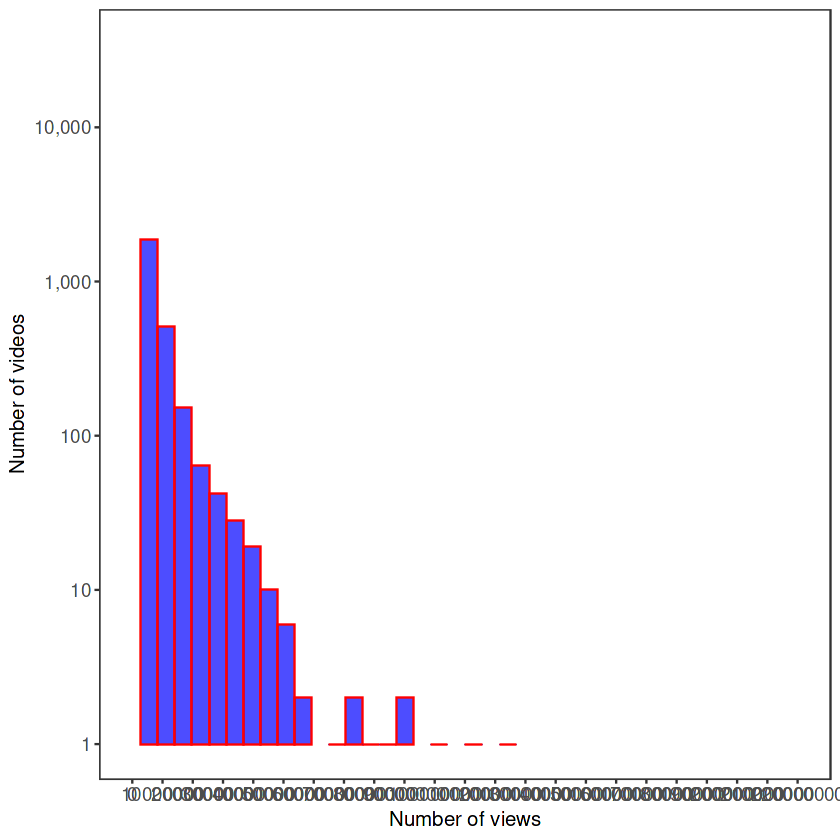

In [68]:

ggplot(India.data, aes(views)) +
  geom_histogram(bins = 40, color = "red", fill = "blue", alpha = 0.7) +
  scale_y_log10(labels = comma_format(big.mark = ",")) +
  scale_x_continuous(labels = seq(0, 220000000, by = 10000000), breaks = seq(0, 220000000, by = 10000000),
                     limits = c(0, 220000000)) +
  labs(x = "Number of views", y = "Number of videos") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        axis.text = element_text(size = 11), axis.title = element_text(size = 12))

In [ ]:
colnames(India.data)

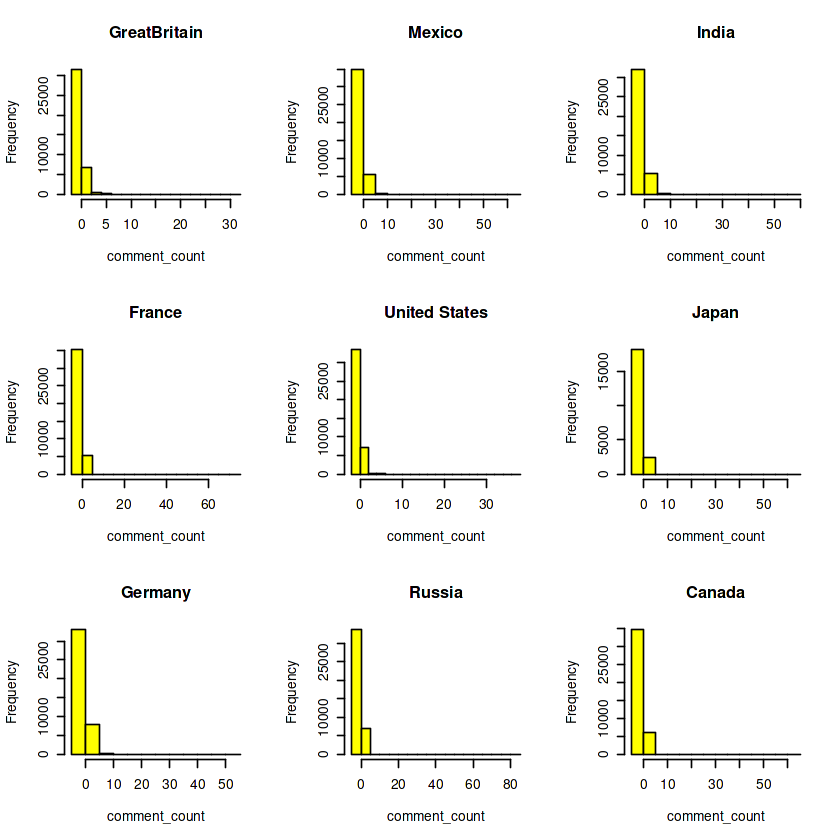

In [40]:
options(scipen=999)  # set the scipen option to a large value to avoid exponential notation

par(mfrow=c(3,3))
hist(GB.data$comment_count, col = "yellow", main= paste("GreatBritain"), xlab = "comment_count")
hist(Mexico.data$comment_count, col = "yellow", main= paste("Mexico"), xlab = "comment_count")
hist(India.data$comment_count, col = "yellow", main= paste("India"), xlab = "comment_count")
hist(France.data$comment_count, col = "yellow", main= paste("France"), xlab = "comment_count")
hist(US.data$comment_count, col = "yellow", main= paste("United States"), xlab = "comment_count")
hist(Japan.data$comment_count, col = "yellow", main= paste("Japan"), xlab = "comment_count")
hist(Germany.data$comment_count, col = "yellow", main= paste("Germany"), xlab = "comment_count")
hist(Russia.data$comment_count, col = "yellow", main= paste("Russia"), xlab = "comment_count")
hist(Cannada.data$comment_count, col = "yellow", main= paste("Canada"), xlab = "comment_count")

the histograms suggest that the distribution of comment counts is almost similar across countries.

Note -> Japan has very low Viewership




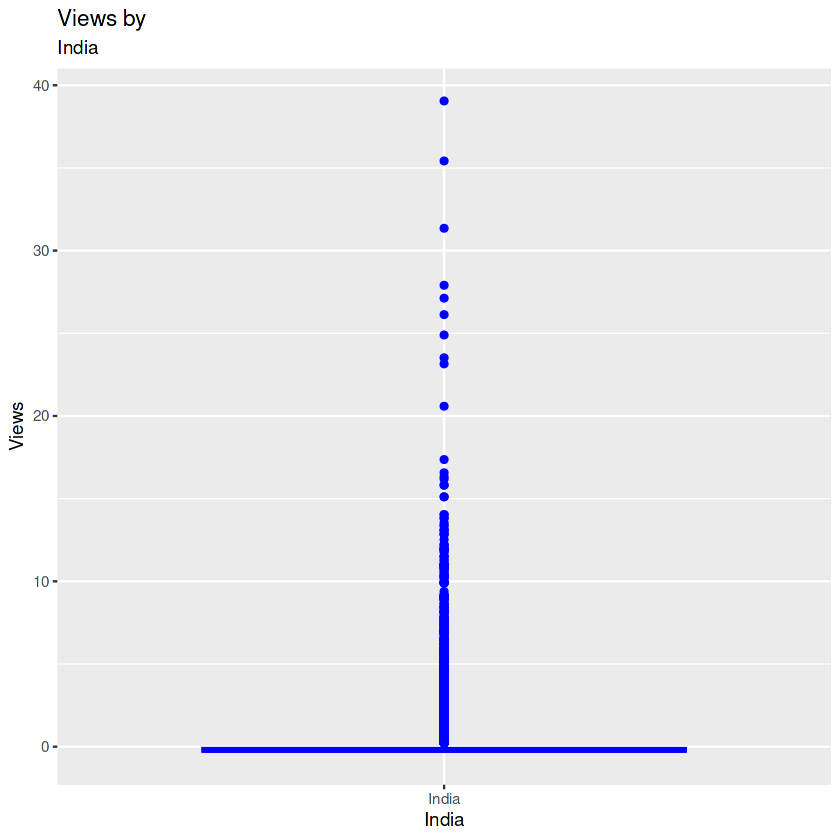

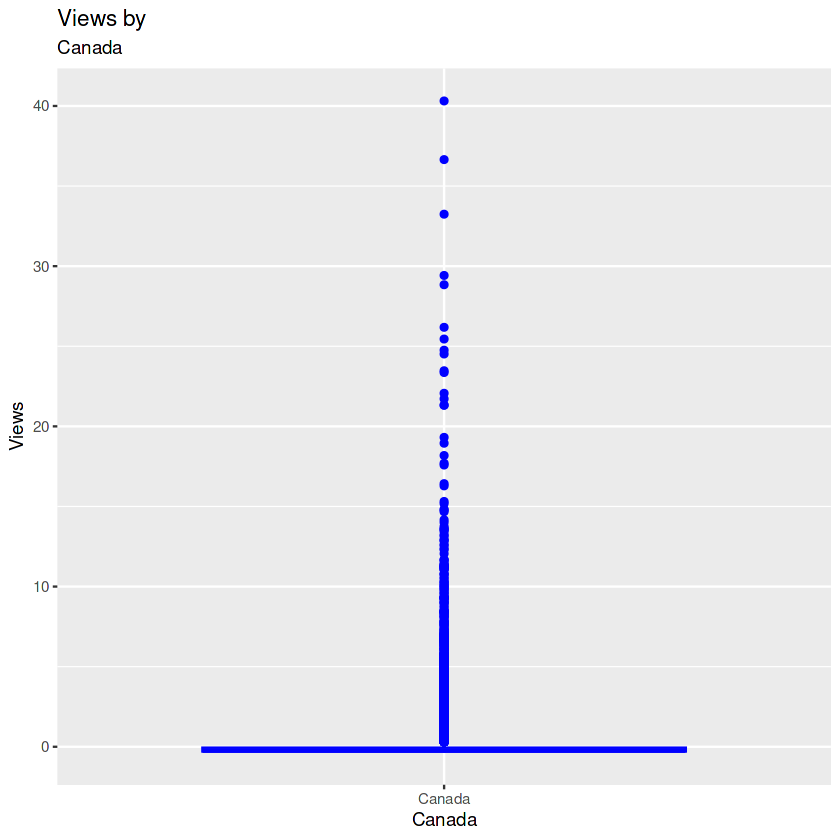

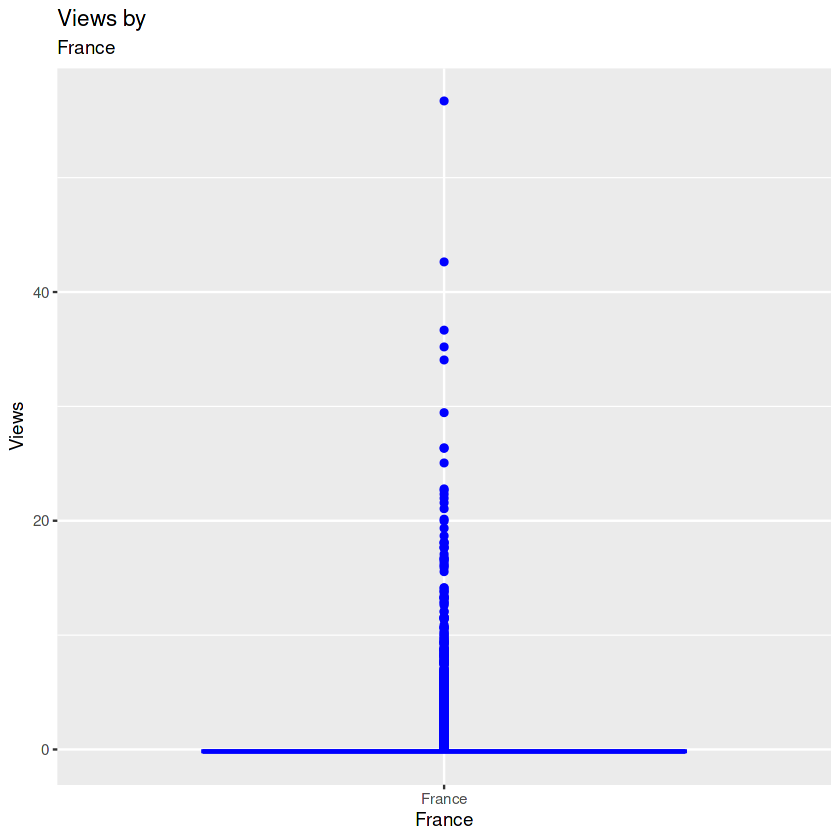

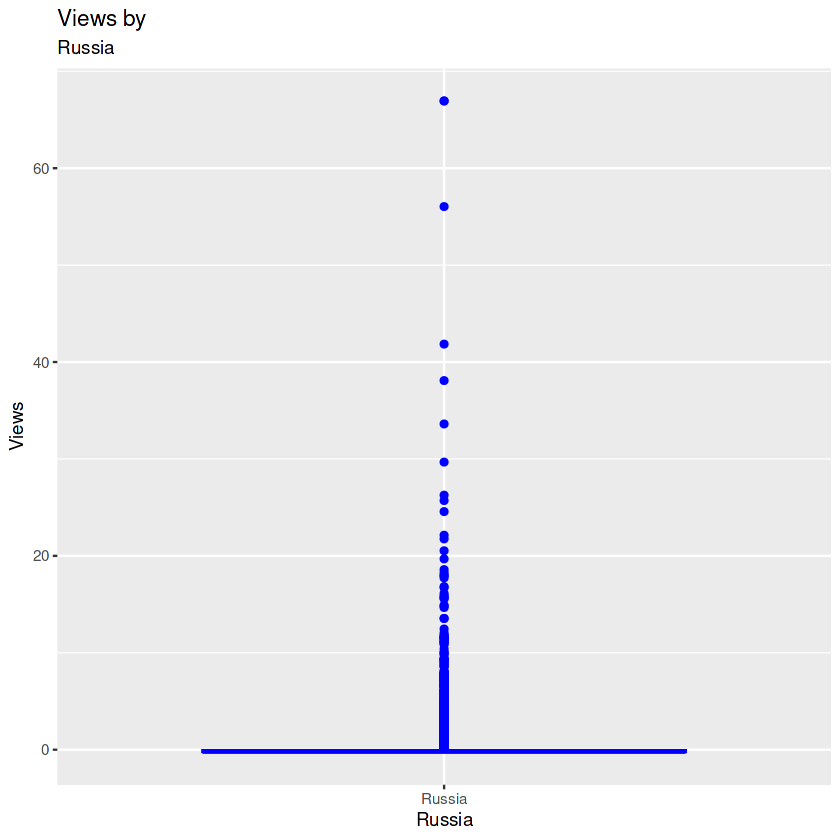

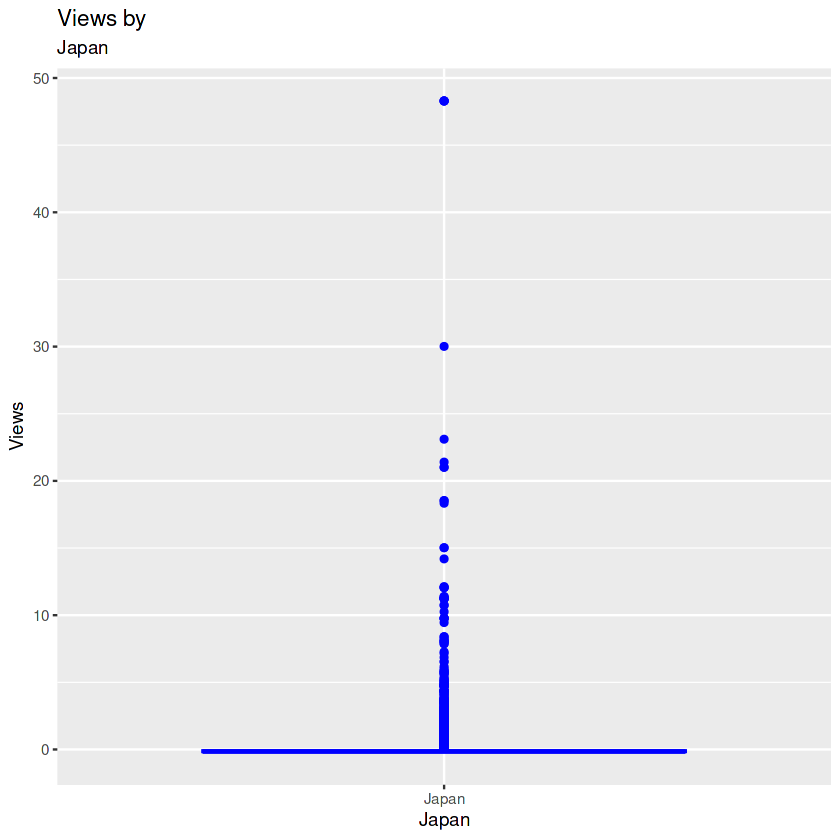

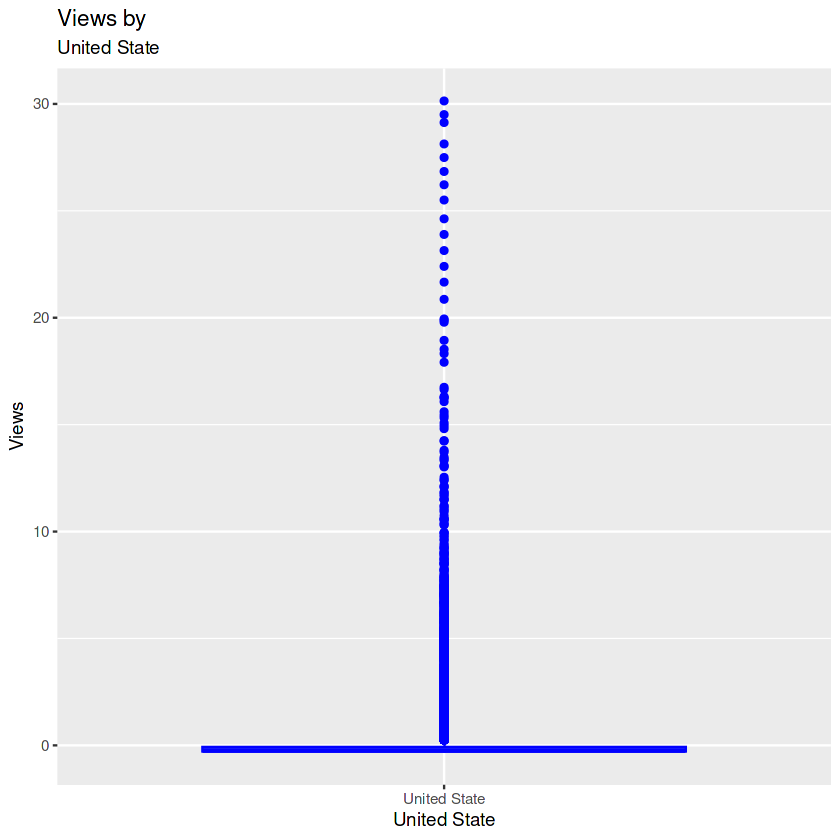

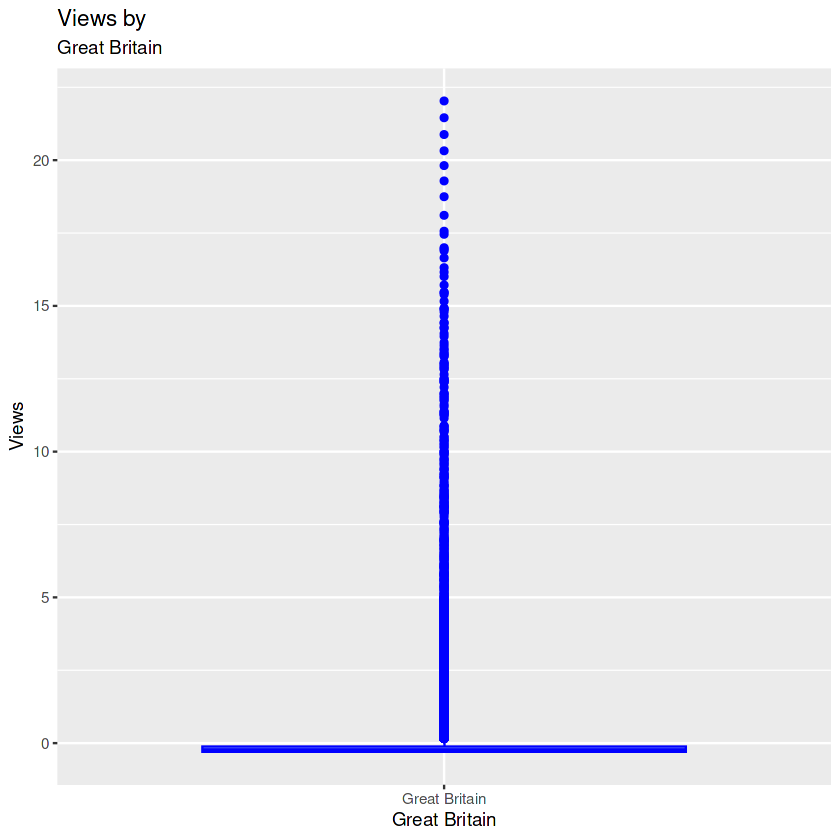

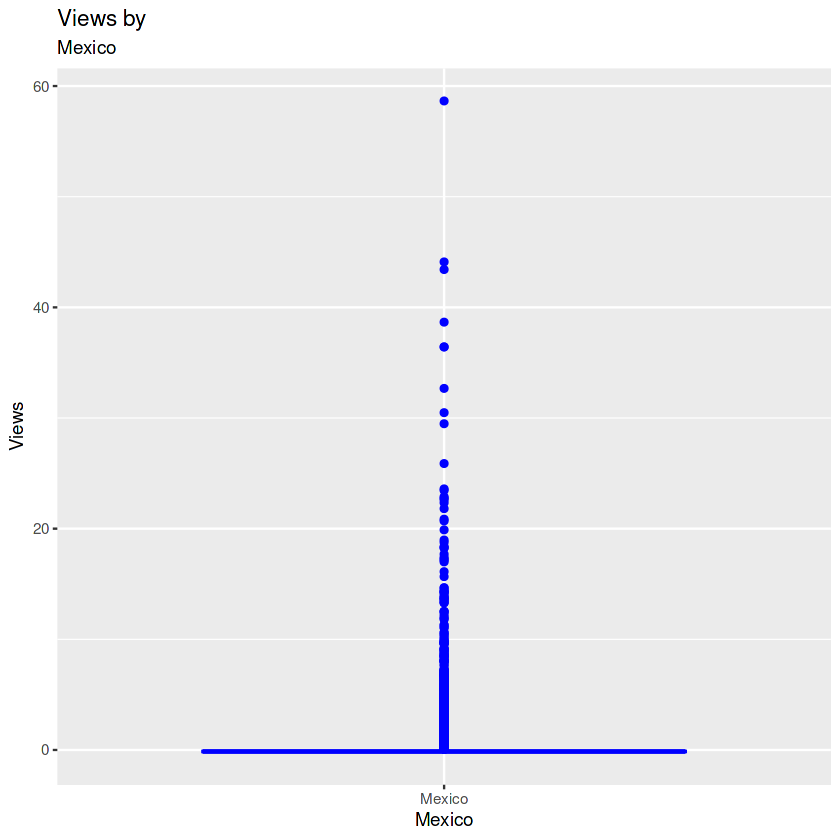

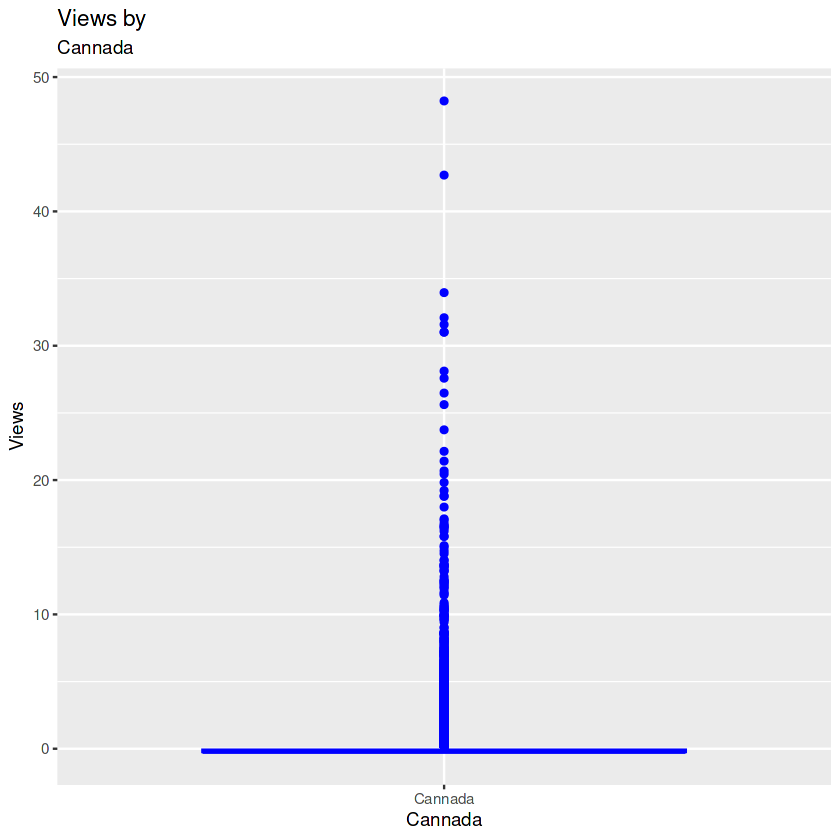

In [43]:
plot_views_by_country <- function(data,country) {
  require(ggplot2)
  ggplot(data, aes(x = country, y = views)) +
    geom_boxplot(fill = "lightblue", color = "blue") +
    ggtitle("Views by ",{country}) +
    xlab({country}) +
    ylab("Views")
}

plot_views_by_country(India.data,"India")
plot_views_by_country(Germany.data,"Canada")
plot_views_by_country(France.data,"France")
plot_views_by_country(Russia.data,"Russia")
plot_views_by_country(Japan.data,"Japan")
plot_views_by_country(US.data,"United State")
plot_views_by_country(GB.data, "Great Britain")
plot_views_by_country(Mexico.data, "Mexico")
plot_views_by_country(Cannada.data, "Cannada")

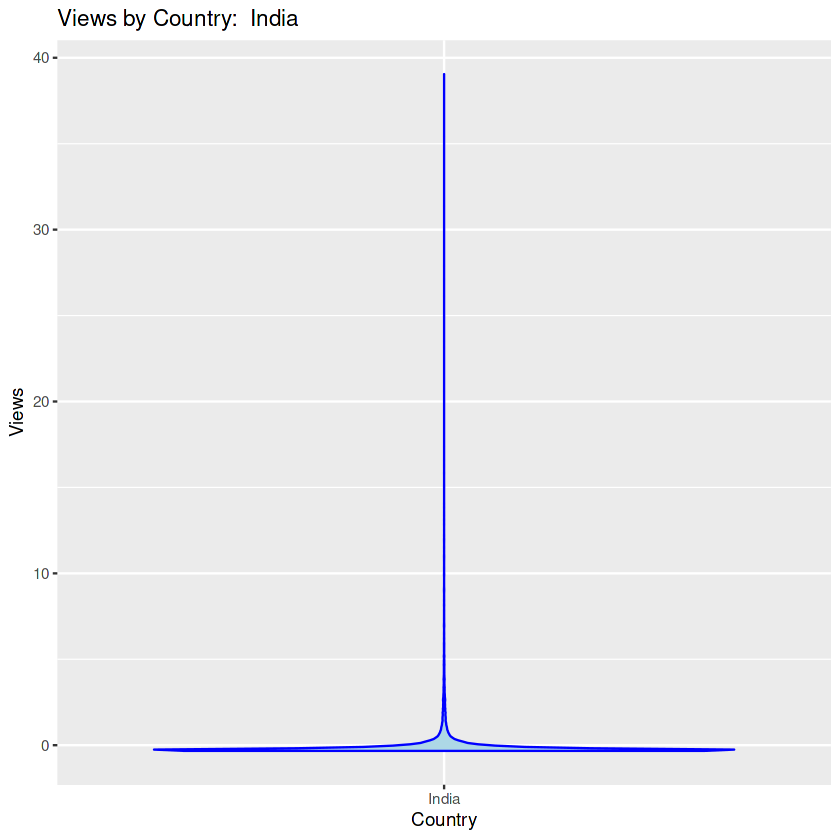

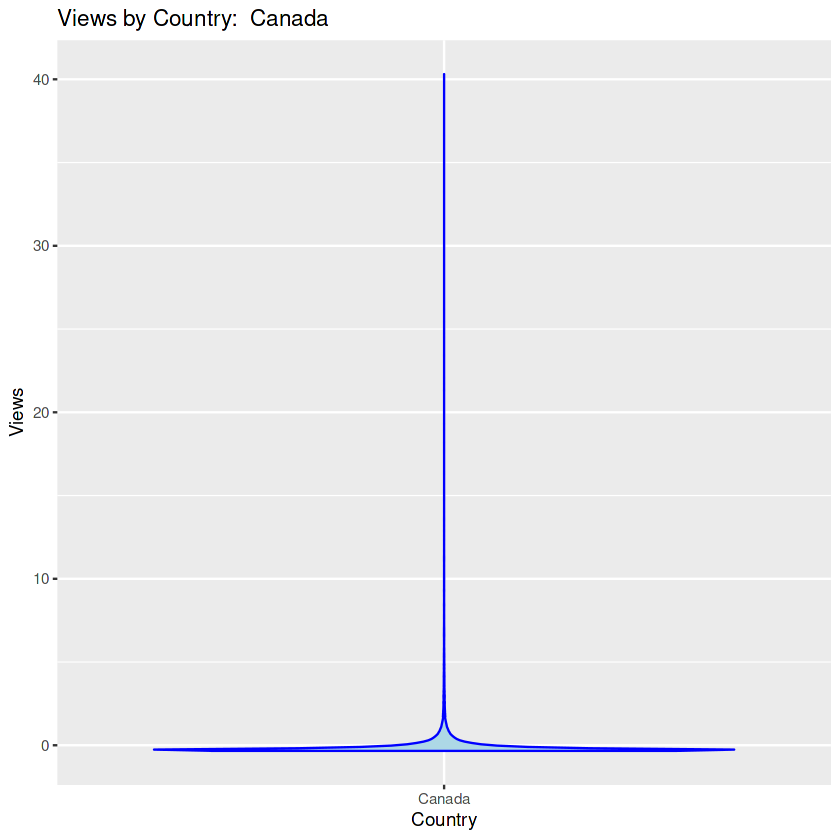

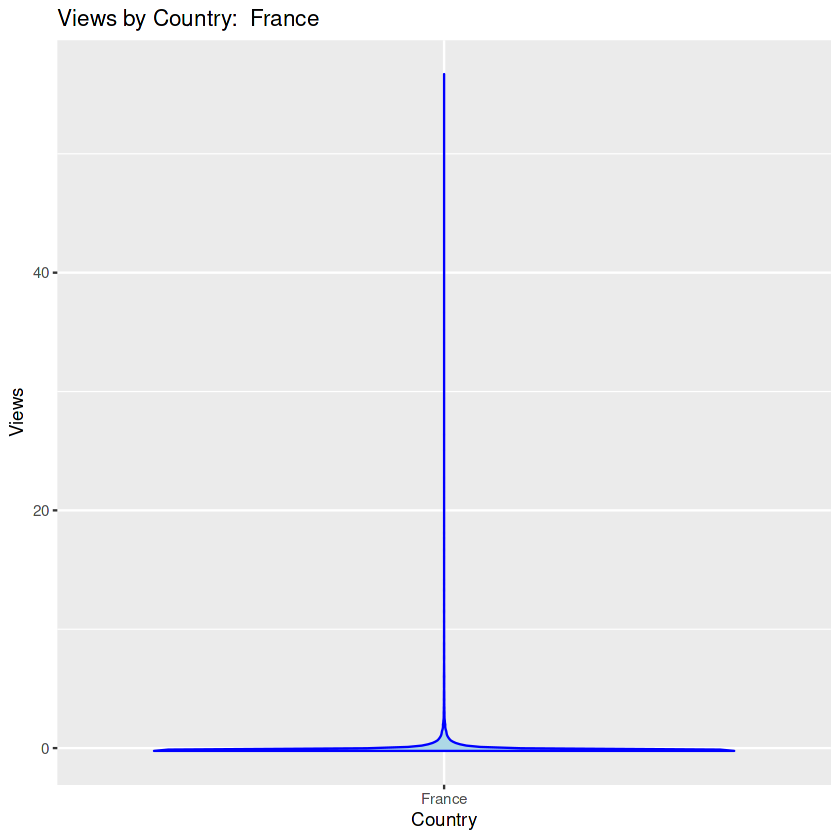

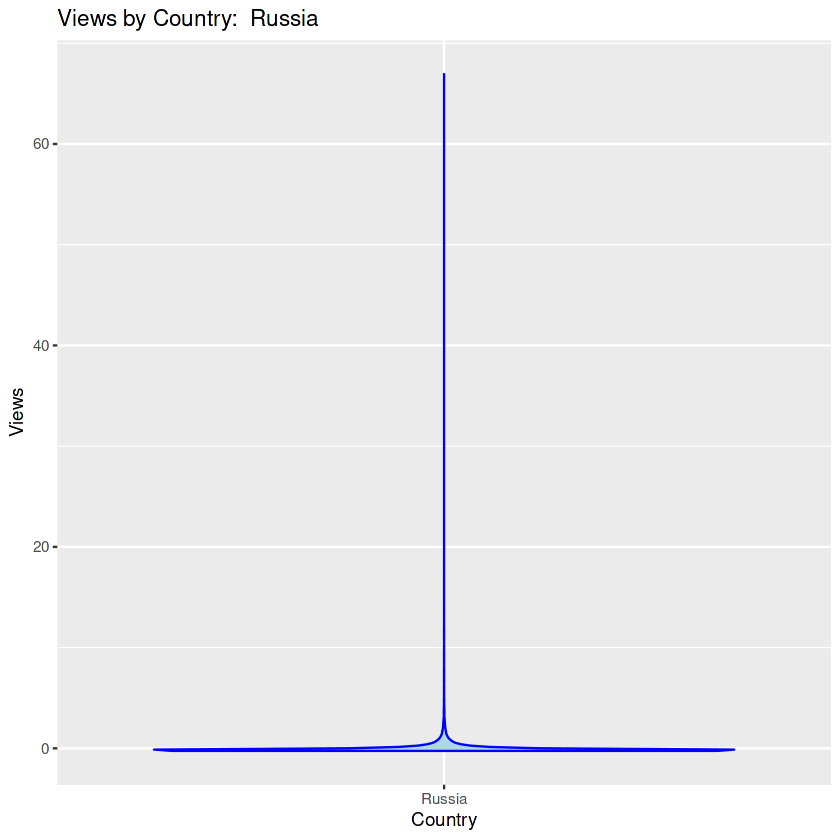

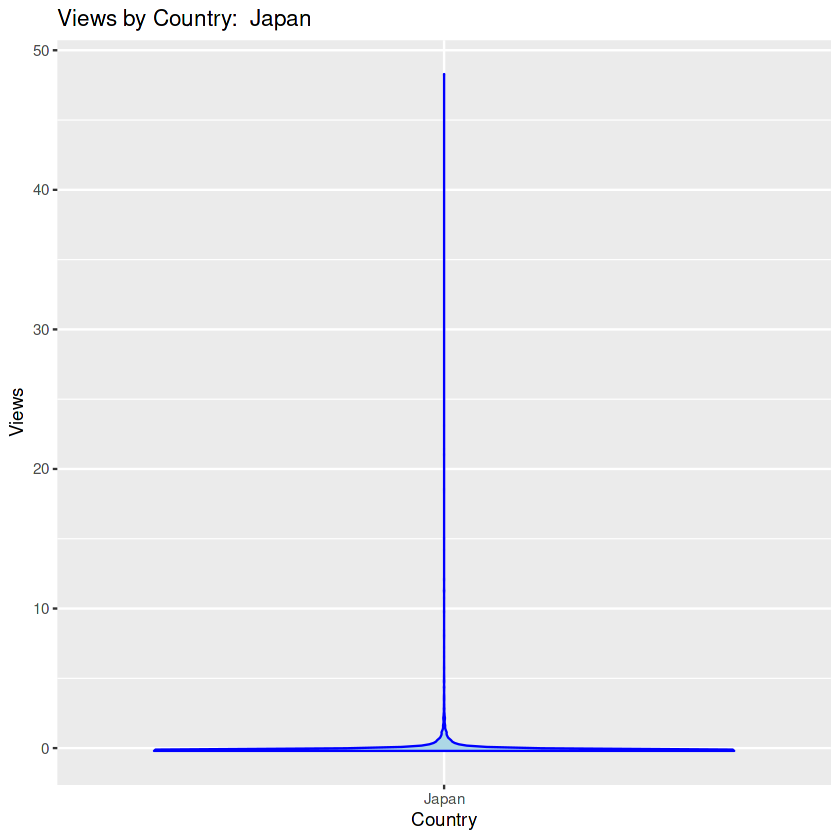

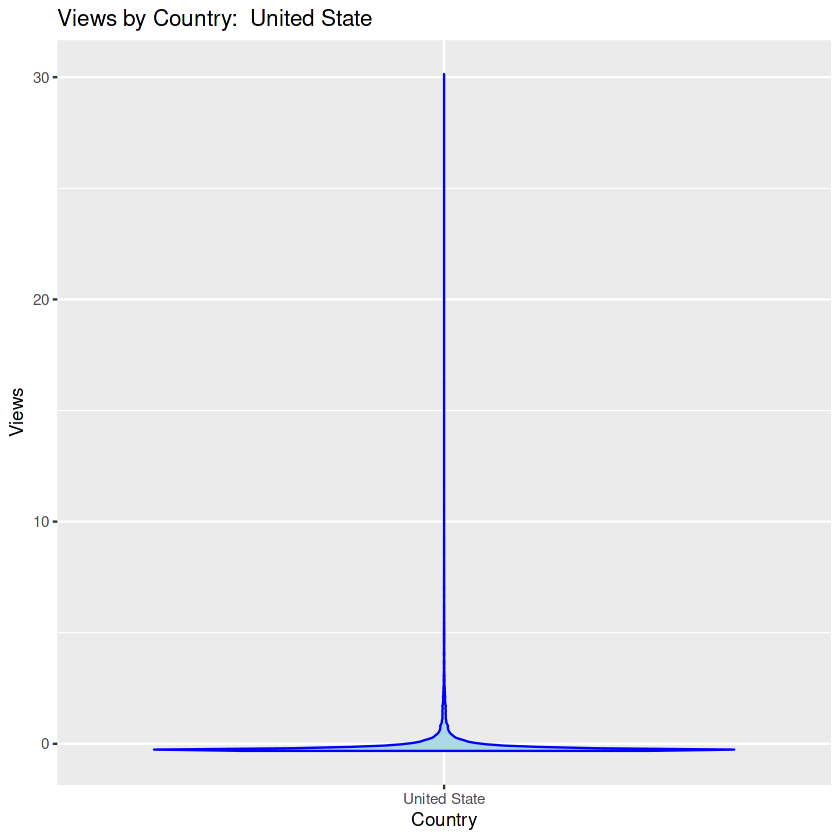

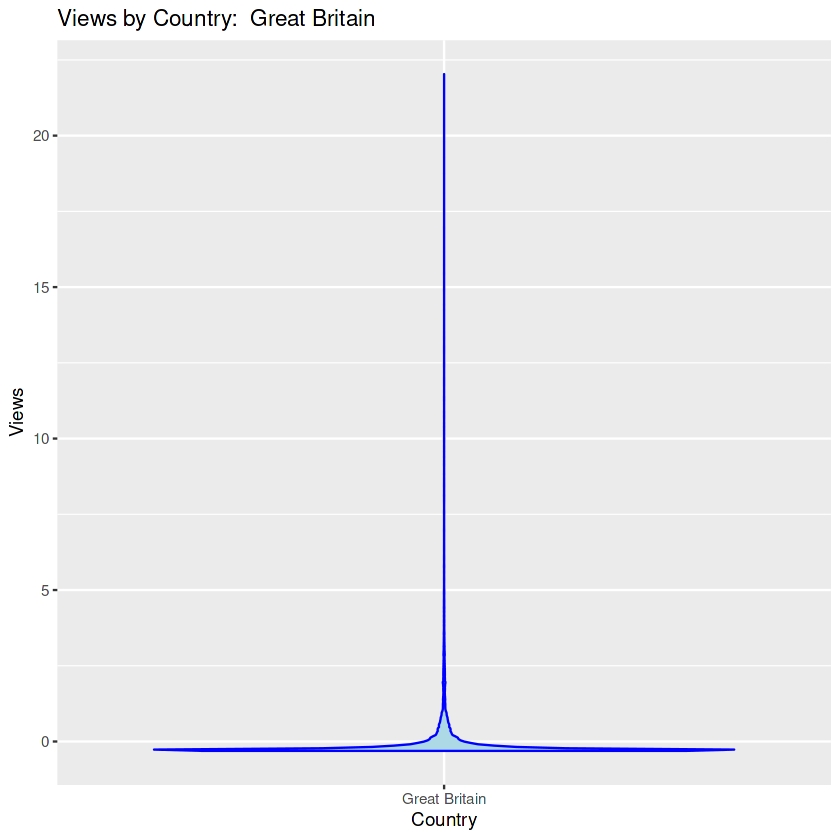

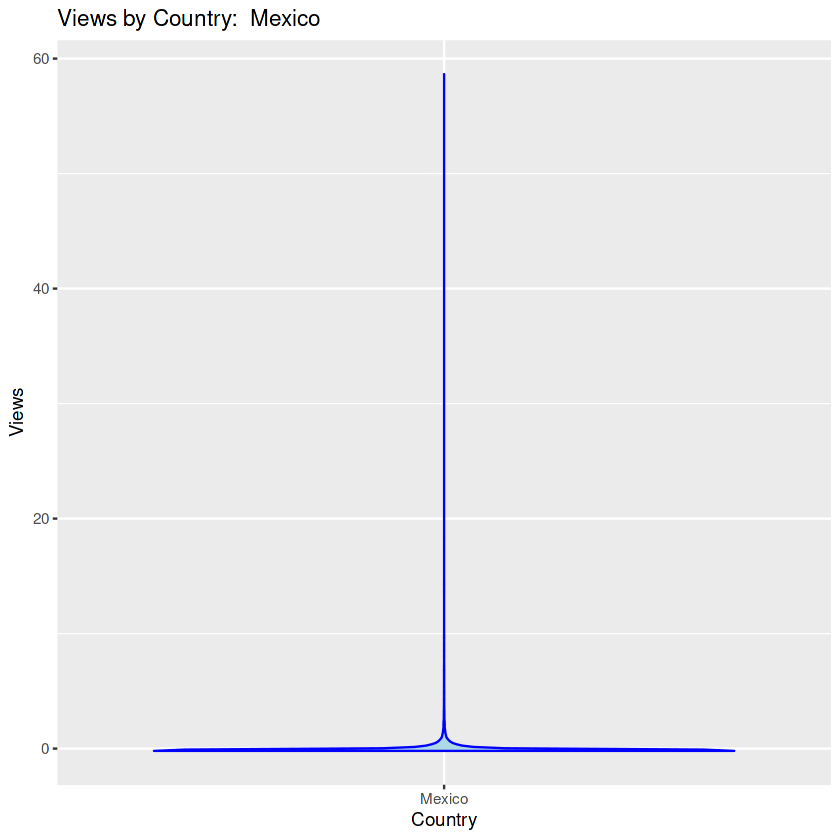

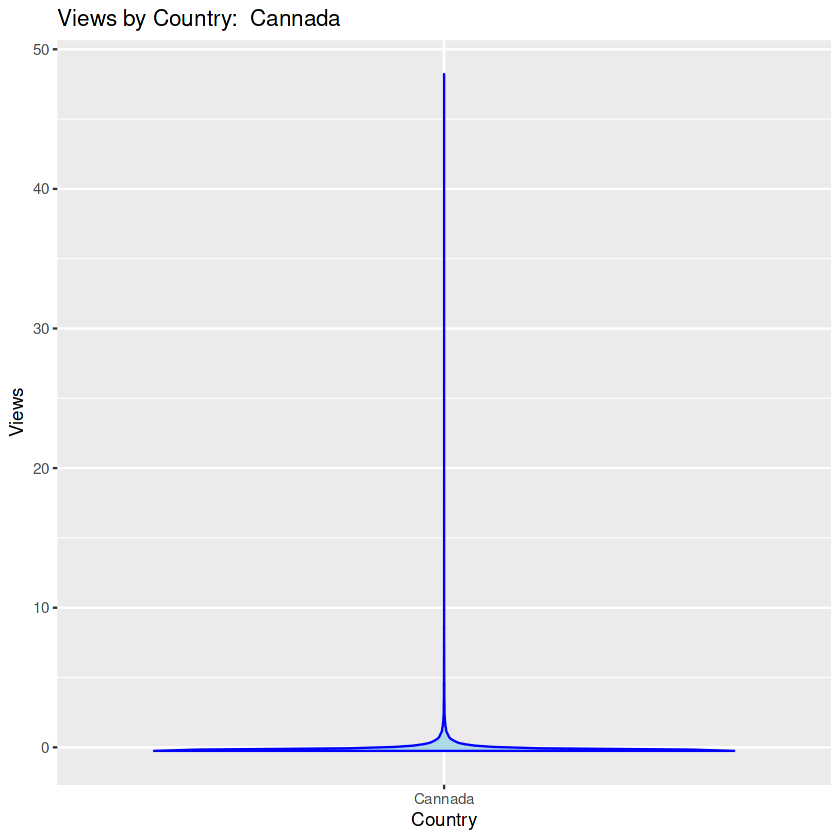

In [44]:
plot_views_violin_by_country <- function(data, country) {
  ggplot(data = data, aes(x = country, y = views)) +
    geom_violin(fill = "lightblue", color = "blue") +
    ggtitle(paste("Views by Country: ", country)) +
    xlab("Country") +
    ylab("Views")
}

plot_views_violin_by_country(India.data,"India")
plot_views_violin_by_country(Germany.data,"Canada")
plot_views_violin_by_country(France.data,"France")
plot_views_violin_by_country(Russia.data,"Russia")
plot_views_violin_by_country(Japan.data,"Japan")
plot_views_violin_by_country(US.data,"United State")
plot_views_violin_by_country(GB.data, "Great Britain")
plot_views_violin_by_country(Mexico.data, "Mexico")
plot_views_violin_by_country(Cannada.data, "Cannada")

In [80]:
library(corrplot)
cor_matrix1 <- cor(GB.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix2 <- cor(India.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix3 <- cor(France.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix4 <- cor(Russia.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix5 <- cor(Cannada.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix6 <- cor(US.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix7 <- cor(Germany.data[,c("title_length","category_id","likes","views","dislikes") ])
cor_matrix8 <- cor(Japan.data[,c("title_length","category_id","likes","views","dislikes") ])

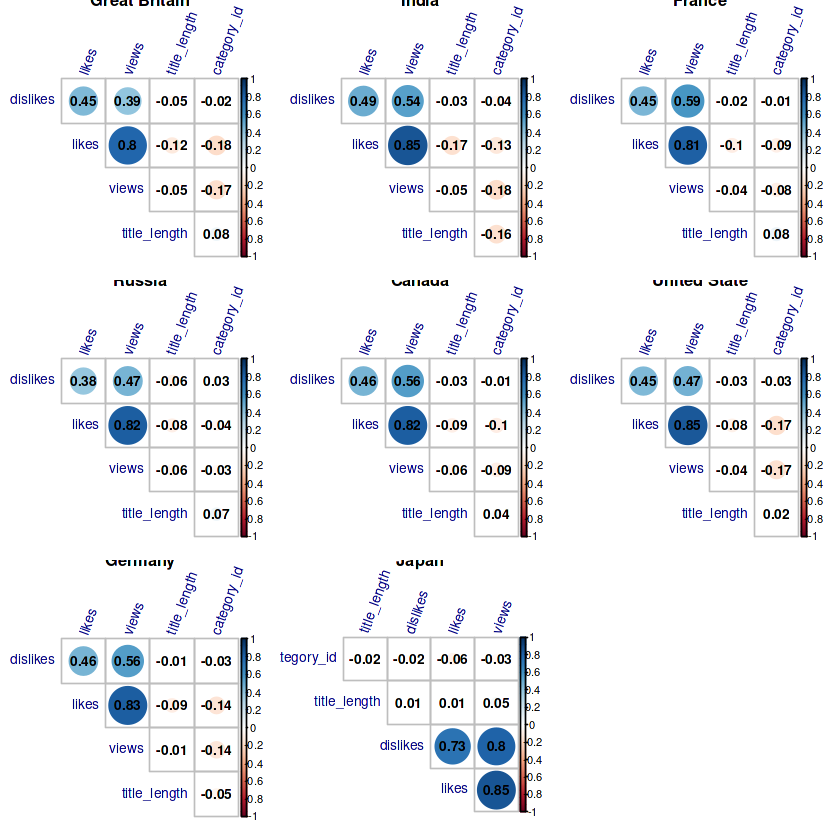

In [81]:
# Plot the correlation matrix
par(mfrow =c(3,3))
corrplot(cor_matrix1, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F,title = "Great Britain")
corrplot(cor_matrix2, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F,title= "India")
corrplot(cor_matrix3, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F,title= "France")
corrplot(cor_matrix4, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F,title= "Russia")
corrplot(cor_matrix5, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F,title= "Canada")
corrplot(cor_matrix6, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F,title= "United State")
corrplot(cor_matrix7, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F,title= "Germany")
corrplot(cor_matrix8, type = "upper", order = "hclust", tl.col = "navy", tl.srt = 70, addCoef.col = "black", diag = F,title= "Japan")


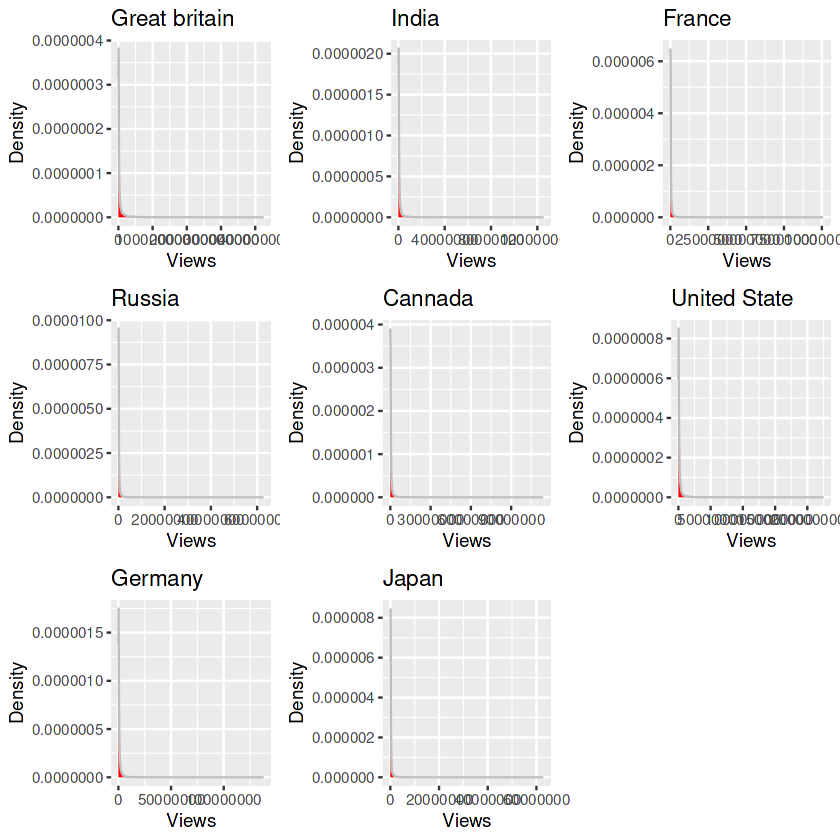

In [69]:
view1.data <- GB.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view2.data <- India.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view3.data <- France.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view4.data <- Russia.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view5.data <- Cannada.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view6.data <- US.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view7.data <- Germany.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")
view8.data <- Japan.data$views %>% as.integer() %>%as.data.frame() %>% rename( views=".")

library(cowplot)


p1 <- ggplot(data = view1.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Great britain")

p2 <- ggplot(data = view2.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("India")

p3 <- ggplot(data = view3.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("France")

p4 <- ggplot(data = view4.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Russia")

p5 <- ggplot(data = view5.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Cannada")

p6 <- ggplot(data = view6.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("United State")

p7 <- ggplot(data = view7.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Germany")

p8 <- ggplot(data = view8.data, aes(x = views)) + 
  geom_density(fill = "red", color = "grey", alpha = 1.44) +
  xlab("Views") +
  ylab("Density") +
  ggtitle("Japan")

plot_grid(p1, p2,p3,p4,p5,p6,p7,p8, ncol = 3)

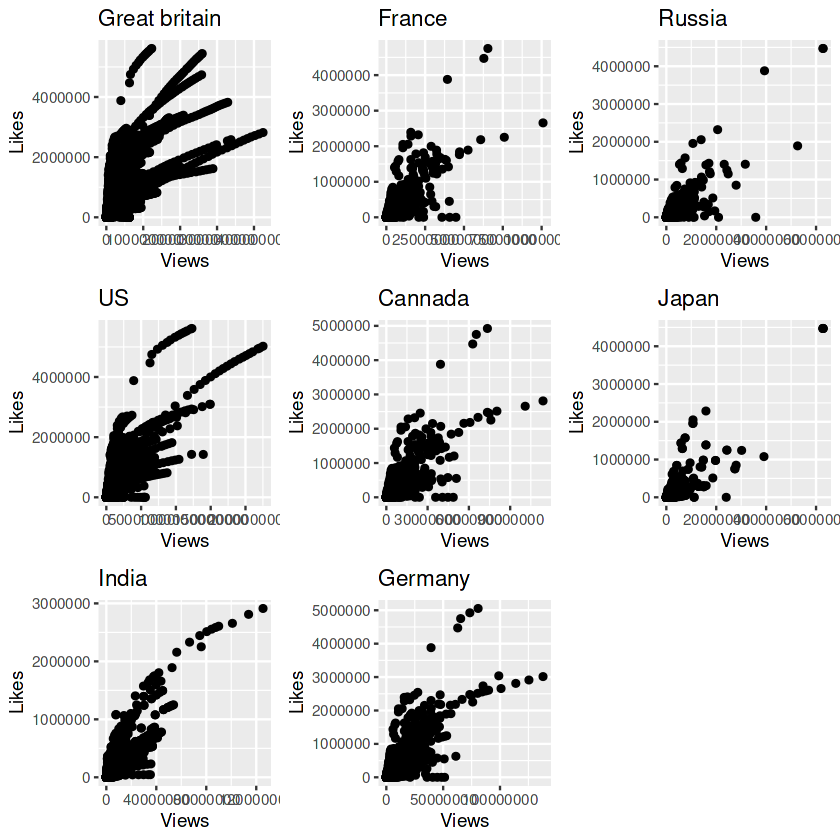

In [72]:
x1 <- ggplot(data = GB.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Great britain")

x2 <- ggplot(data = France.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("France")

x3 <- ggplot(data = Russia.data, aes(x = views, y = likes), col="red") +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Russia")

x4 <- ggplot(data = US.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("US")

x5 <- ggplot(data = Cannada.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Cannada")

x6 <- ggplot(data = Japan.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Japan")

x7 <- ggplot(data = India.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("India")

x8 <- ggplot(data = Germany.data, aes(x = views, y = likes),) +
  geom_point() +
  labs(x = "Views", y = "Likes") +
  ggtitle("Germany")

plot_grid(x1, x2,x3,x4,x5,x6,x7,x8, ncol = 3)

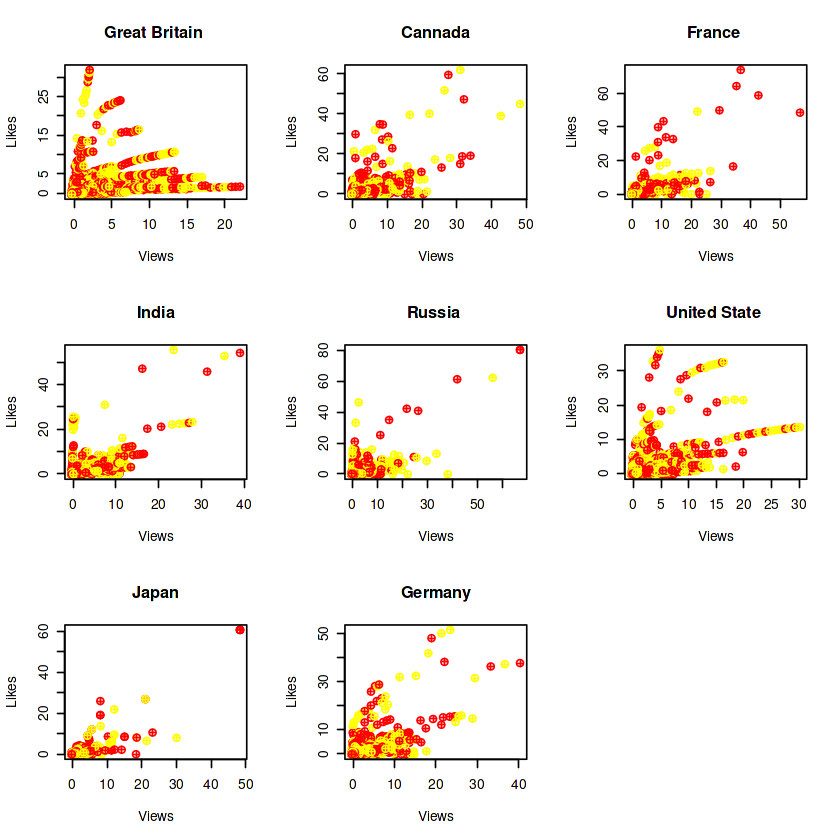

In [73]:
par(mfrow =c(3,3))

plot(scale(GB.data$views), scale(GB.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Great Britain ")
plot(scale(Cannada.data$views), scale(Cannada.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Cannada")
plot(scale(France.data$views), scale(France.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "France ")
plot(scale(India.data$views), scale(India.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "India")
plot(scale(Russia.data$views), scale(Russia.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Russia ")
plot(scale(US.data$views), scale(US.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "United State ")
plot(scale(Japan.data$views), scale(Japan.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Japan")
plot(scale(Germany.data$views), scale(Germany.data$comment_count), col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = "Germany")


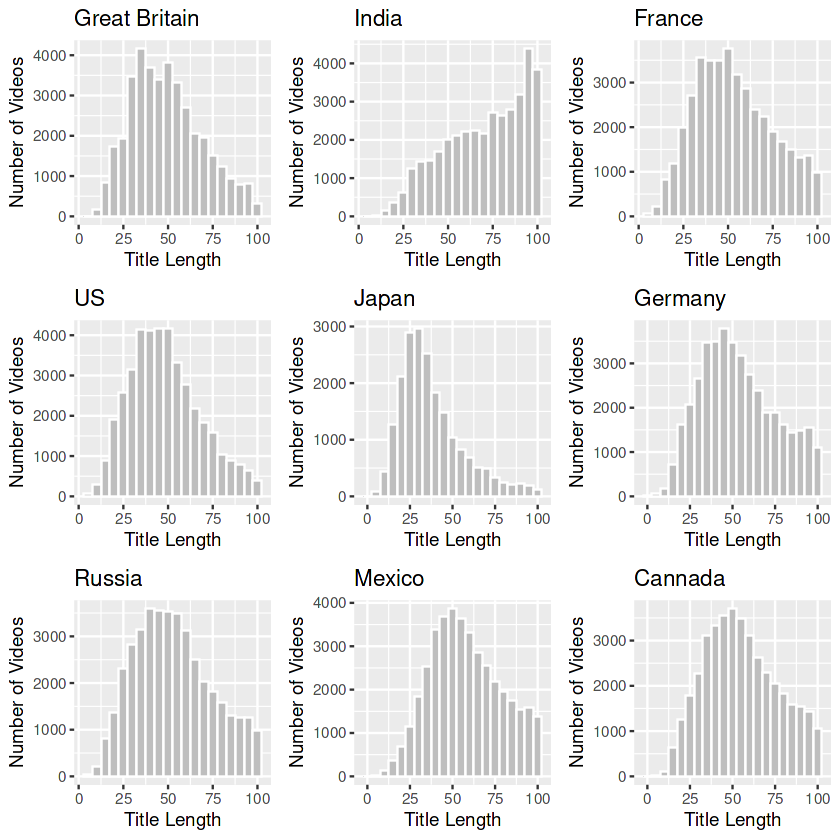

In [82]:
# create a list of all the data frames
country_data <- list(GB.data, India.data, France.data, US.data, Japan.data, Germany.data, Russia.data, Mexico.data, Cannada.data)

# create a list of all the country names
country_names <- c("Great Britain", "India", "France", "US", "Japan", "Germany", "Russia", "Mexico", "Cannada")

# create an empty list to store the plots
plots <- list()

# loop through the data and generate a histogram for each country
for(i in seq_along(country_data)) {
  plt <- ggplot(data = country_data[[i]], aes(x = title_length)) +
    geom_histogram(binwidth = 5, fill = "grey", color = "white") +
    labs(x = "Title Length", y = "Number of Videos") +
    ggtitle(country_names[i])
  plots[[i]] <- plt
}

# combine all the plots using grid.arrange() from the gridExtra package
library(gridExtra)
grid.arrange(grobs = plots, ncol = 3)

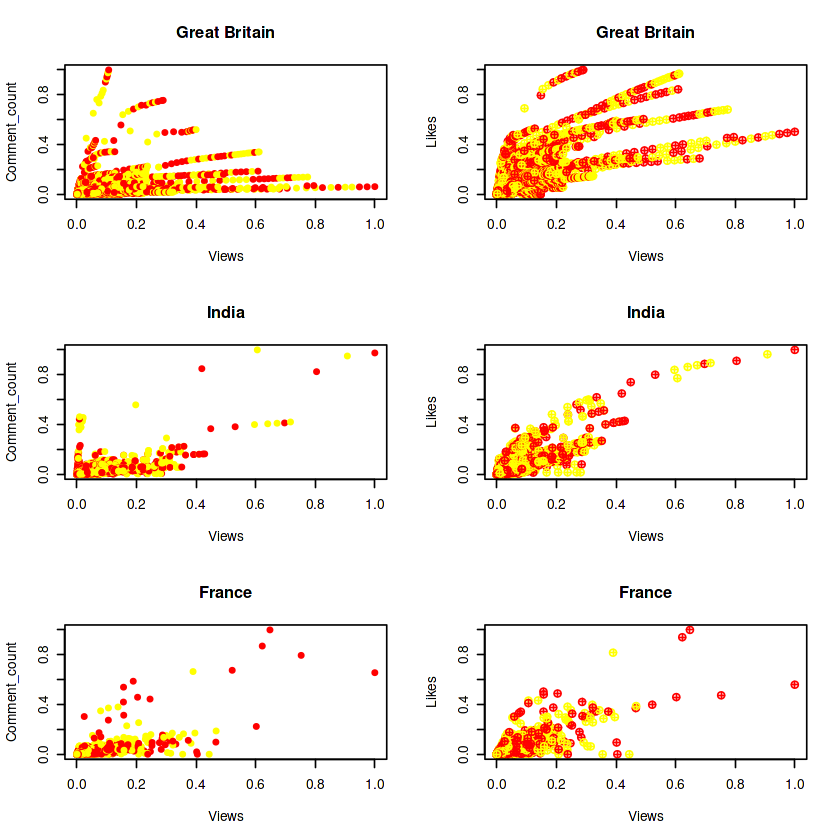

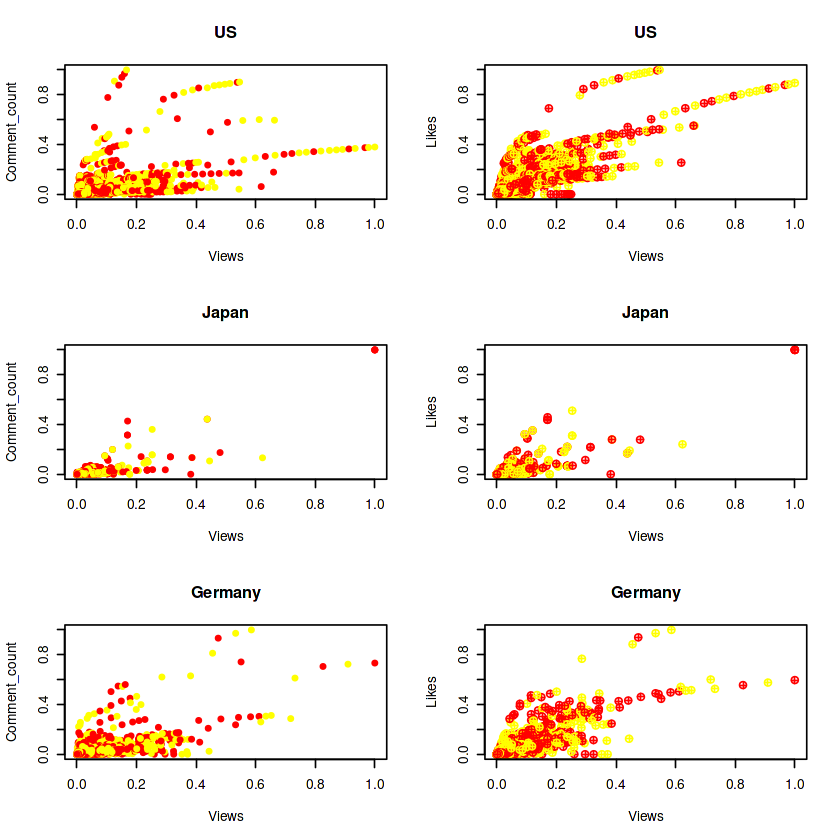

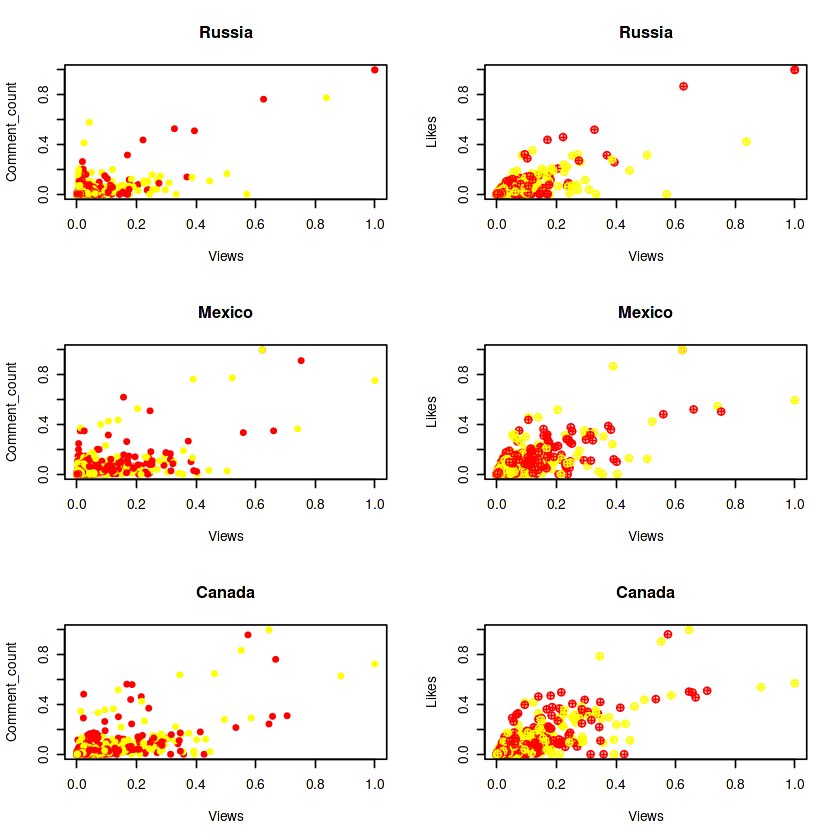

In [84]:
par(mfrow=c(3,2))
normalize_data <- function(data, country) {
  data_norm <- data
  data_norm$views <- (data$views - min(data$views)) / (max(data$views) - min(data$views))
  data_norm$likes <- (data$likes - min(data$likes)) / (max(data$likes) - min(data$likes))
  data_norm$comment_total <- (data$comment_count - min(data$comment_count)) / (max(data$comment_count) - min(data$comment_count))
  
  # plot the data
  plot(data_norm$views, data_norm$comment_total, col = c("red","yellow"), pch = 16, xlab = "Views", ylab = "Comment_count", main = paste(country))
  
  plot(data_norm$views, data_norm$likes, col = c("red","yellow"), pch = 10, xlab = "Views", ylab = "Likes", main = paste( country))
  
  return(data_norm)
}

GB.data_norm <- normalize_data(GB.data, "Great Britain")
India.data_norm <- normalize_data(India.data, "India")
France.data_norm <- normalize_data(France.data, "France")
US.data_norm <- normalize_data(US.data, "US")
Japan.data_norm <- normalize_data(Japan.data, "Japan")
Germany.data_norm <- normalize_data(Germany.data, "Germany")
Russia.data_norm <- normalize_data(Russia.data, "Russia")
Mexico.data_norm <- normalize_data(Mexico.data, "Mexico")
Canada.data_norm <- normalize_data(Cannada.data, "Canada")


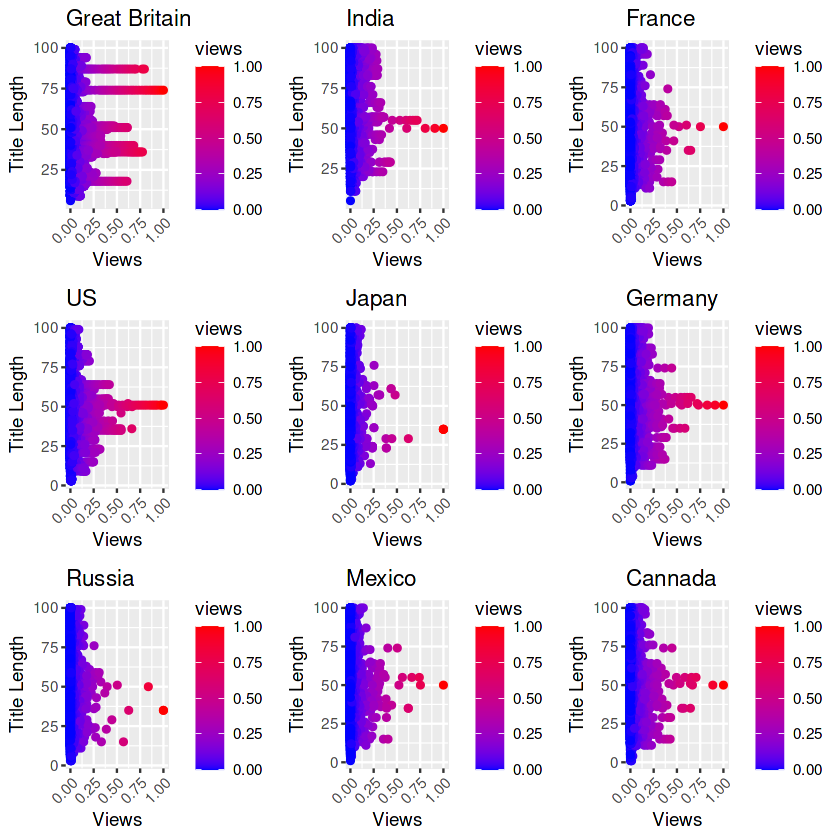

In [85]:
library(ggplot2)

# define the function to generate the plot for a single country
generate_plot <- function(country_data, country_name) {
  ggplot(data = country_data, aes(x = title_length, y = views, color = views)) +
    geom_point() +
    labs(x = "Title Length", y = "Views") +
    ggtitle(paste( country_name)) +
    scale_color_gradient(low = "blue", high = "red") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    coord_flip()
}

# create a list of all the data frames
country_data <- list(GB.data_norm, India.data_norm, France.data_norm, US.data_norm, Japan.data_norm, Germany.data_norm, Russia.data_norm, Mexico.data_norm, Canada.data_norm)

# create a list of all the country names
country_names <- c("Great Britain", "India", "France", "US", "Japan", "Germany", "Russia", "Mexico", "Cannada")

# create an empty list to store the plots
plots <- list()

# loop through the data and generate a plot for each country
for(i in seq_along(country_data)) {
  plt <- generate_plot(country_data[[i]], country_names[i])
  plots[[i]] <- plt
}

# combine all the plots using grid.arrange() from the gridExtra package
library(gridExtra)
grid.arrange(grobs = plots, ncol = 3)

In [88]:
GB.data$trend_score <- ((GB.data$views - mean(GB.data$views))/sd(GB.data$views)) + ((GB.data$likes - mean(GB.data$likes))/sd(GB.data$likes)) +((GB.data$comment_count - mean(GB.data$comment_count))/sd(GB.data$comment_count))
India.data$trend_score <- ((India.data$views - mean(India.data$views))/sd(India.data$views)) + ((India.data$likes - mean(India.data$likes))/sd(India.data$likes)) +((India.data$comment_count - mean(India.data$comment_count))/sd(India.data$comment_count))
Germany.data$trend_score <- ((Germany.data$views - mean(Germany.data$views))/sd(Germany.data$views)) + ((Germany.data$likes - mean(Germany.data$likes))/sd(Germany.data$likes)) +((Germany.data$comment_count - mean(Germany.data$comment_count))/sd(Germany.data$comment_count))
Russia.data$trend_score <- ((Russia.data$views - mean(Russia.data$views))/sd(Russia.data$views)) + ((Russia.data$likes - mean(Russia.data$likes))/sd(Russia.data$likes)) +((Russia.data$comment_count - mean(Russia.data$comment_count))/sd(Russia.data$comment_count))
Mexico.data$trend_score <- ((Mexico.data$views - mean(Mexico.data$views))/sd(Mexico.data$views)) + ((Mexico.data$likes - mean(Mexico.data$likes))/sd(Mexico.data$likes)) +((Mexico.data$comment_count - mean(Mexico.data$comment_count))/sd(Mexico.data$comment_count))
Japan.data$trend_score <- ((Japan.data$views - mean(Japan.data$views))/sd(Japan.data$views)) + ((Japan.data$likes - mean(Japan.data$likes))/sd(Japan.data$likes)) +((Japan.data$comment_count - mean(Japan.data$comment_count))/sd(Japan.data$comment_count))
US.data$trend_score <- ((US.data$views - mean(US.data$views))/sd(US.data$views)) + ((US.data$likes - mean(US.data$likes))/sd(US.data$likes)) +((US.data$comment_count - mean(US.data$comment_count))/sd(US.data$comment_count))
Cannada.data$trend_score <- ((Cannada.data$views - mean(Cannada.data$views))/sd(Cannada.data$views)) + ((Cannada.data$likes - mean(Cannada.data$likes))/sd(Cannada.data$likes)) +((Cannada.data$comment_count - mean(Cannada.data$comment_count))/sd(Cannada.data$comment_count))
France.data$trend_score <- ((France.data$views - mean(France.data$views))/sd(France.data$views)) + ((France.data$likes - mean(France.data$likes))/sd(France.data$likes)) +((France.data$comment_count - mean(France.data$comment_count))/sd(France.data$comment_count))



GB.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = GB.data, FUN = mean)
India.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = India.data, FUN = mean)
Germ.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = Germany.data, FUN = mean)
Russiahourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = Russia.data, FUN = mean)
Mexicohourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = Mexico.data, FUN = mean)
Japanhourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = Japan.data, FUN = mean)
US.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data = US.data, FUN = mean)
Cannada.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data =Cannada.data, FUN = mean)
France.hourly_trend <- aggregate(trend_score ~ as.numeric(hour), data =France.data, FUN = mean)

ERROR: Error in as.numeric(hour): cannot coerce type 'closure' to vector of type 'double'


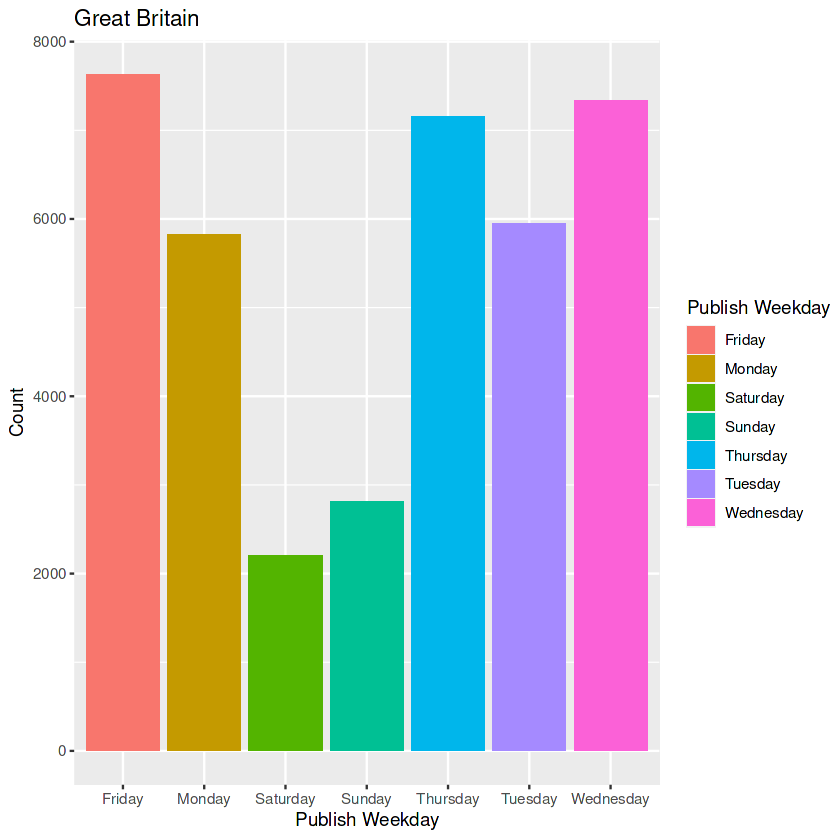

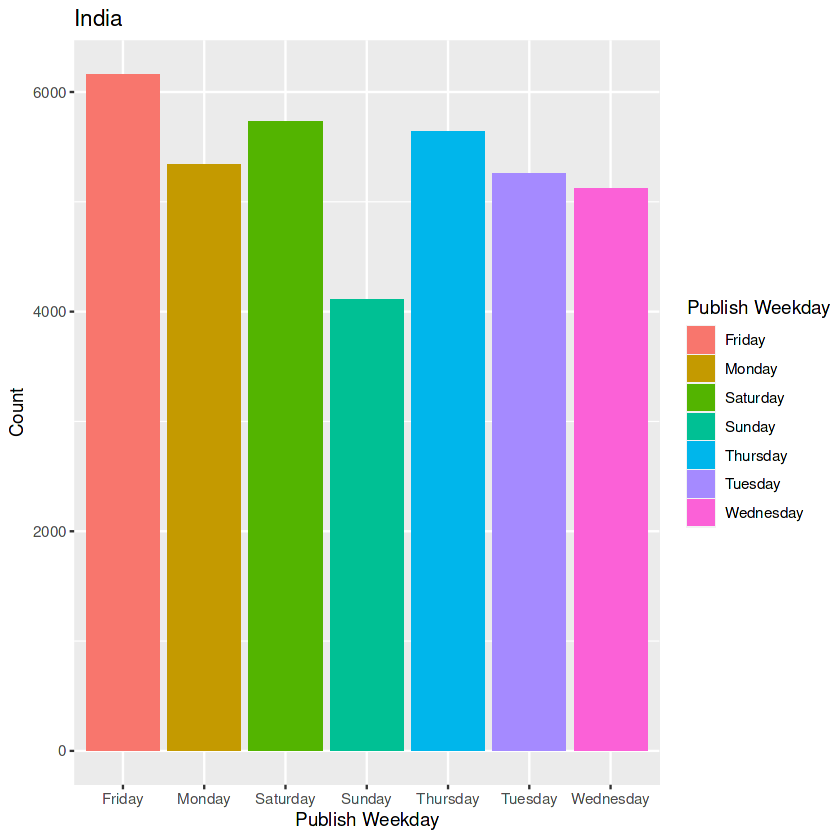

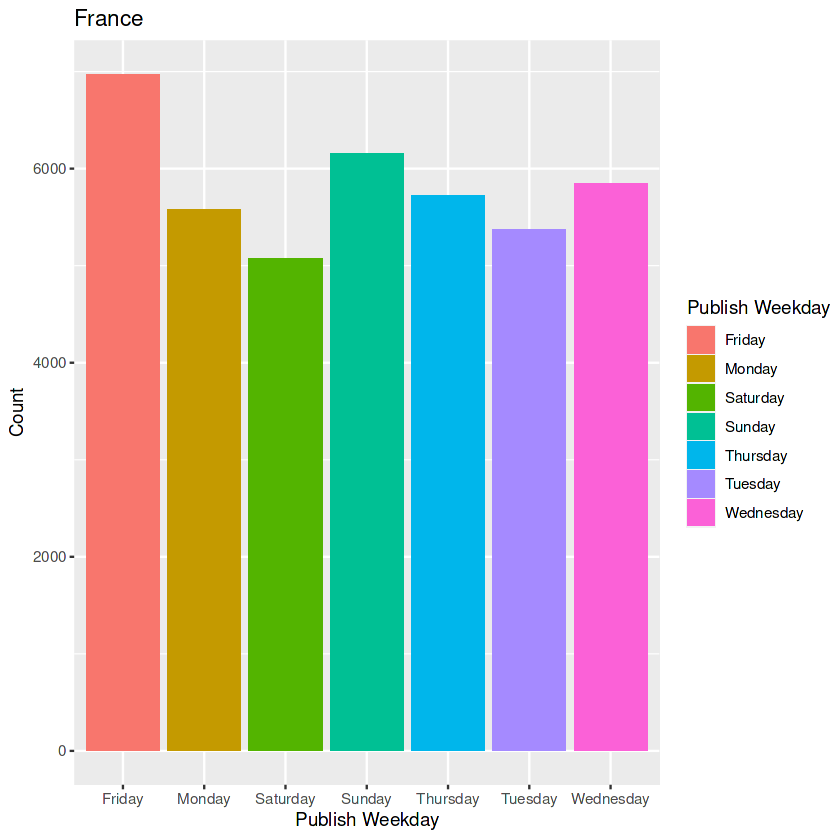

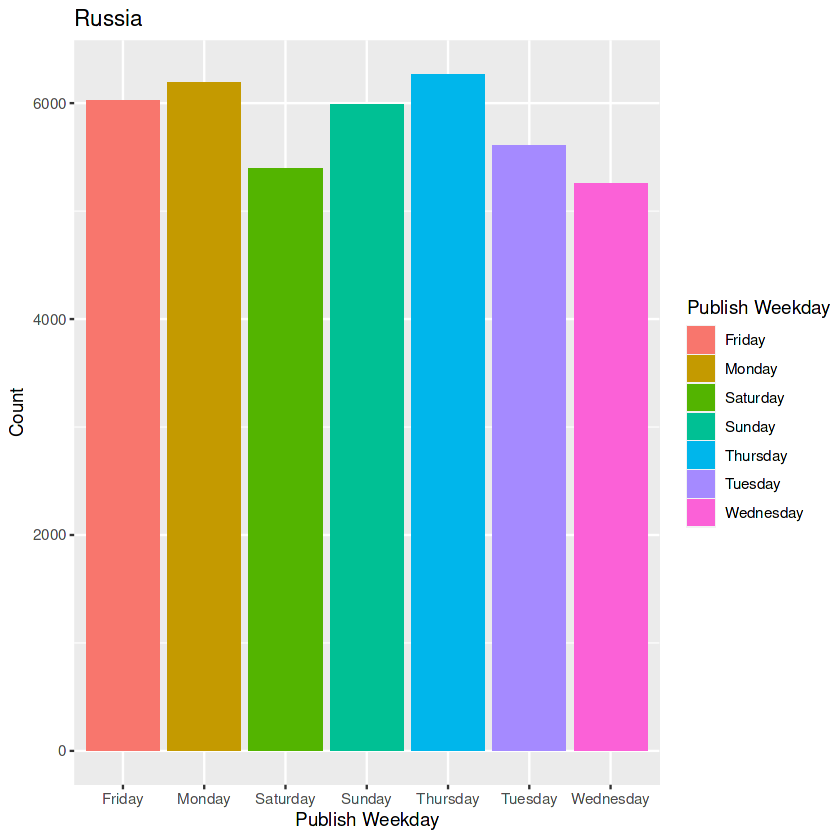

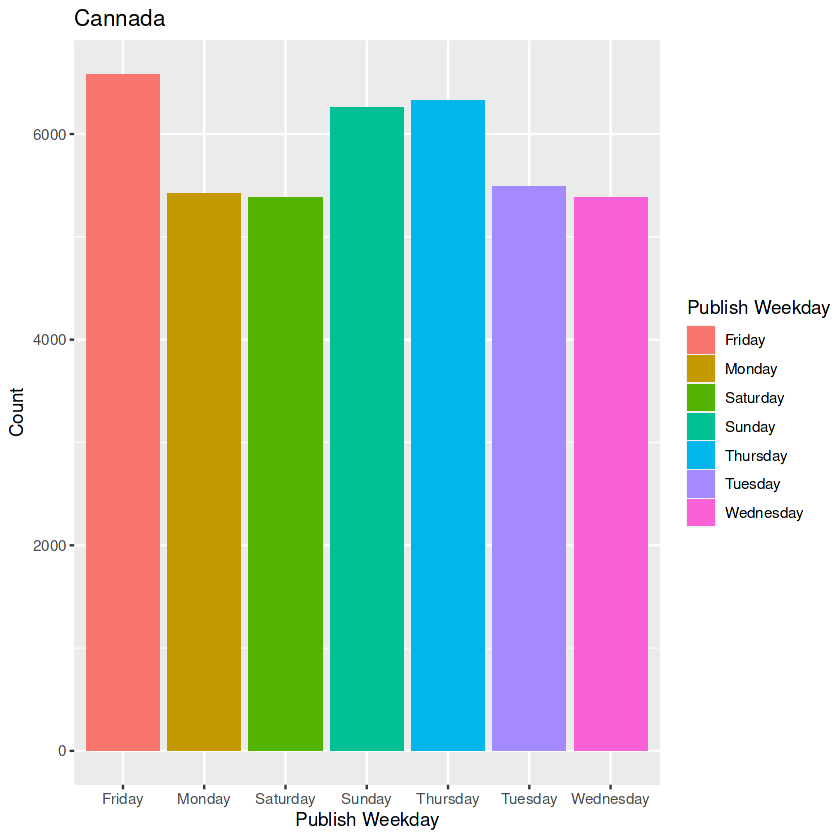

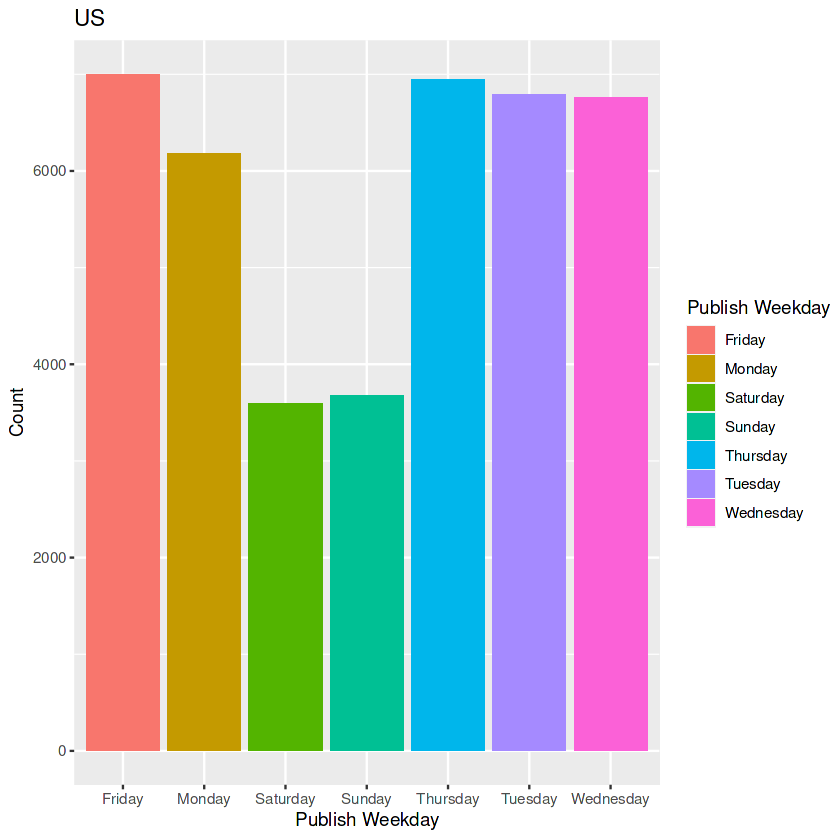

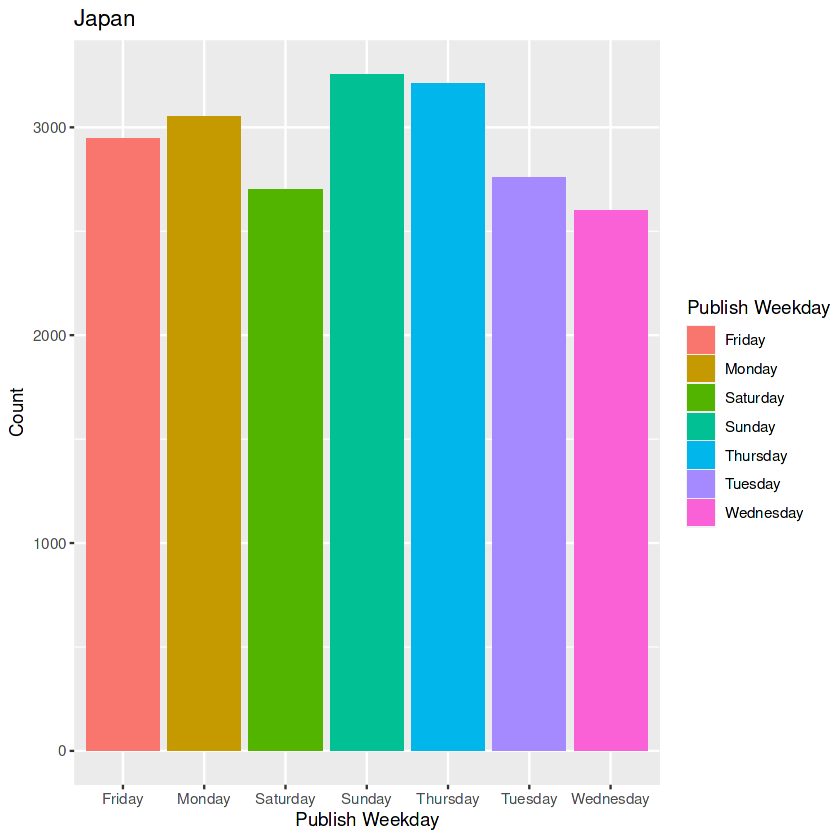

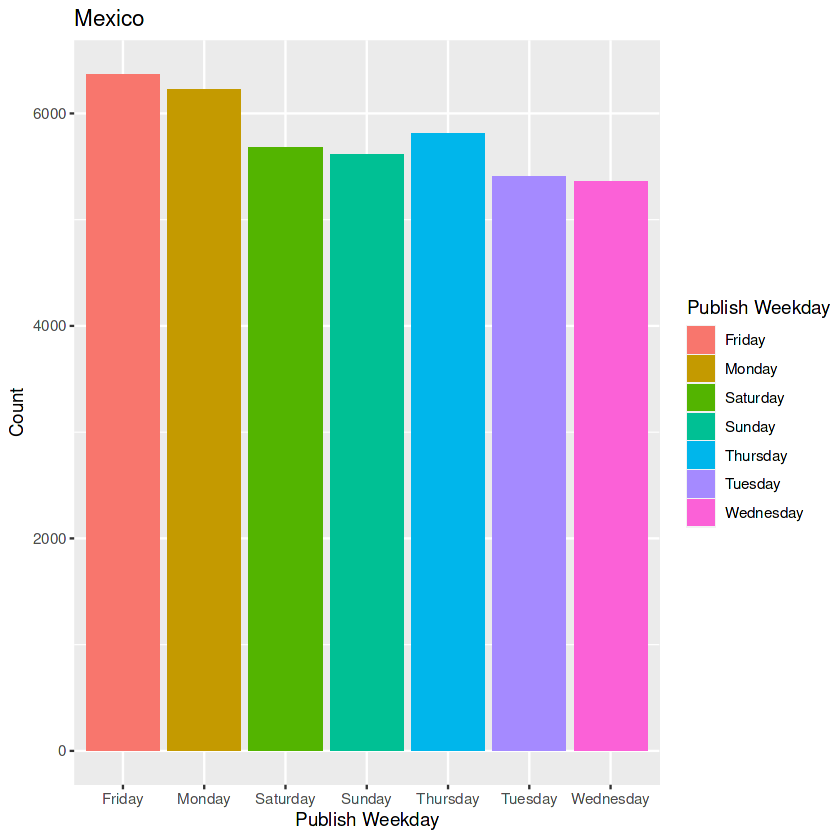

In [97]:
library(tidyverse)
library(gridExtra)

# Define function to create plot for a single country
create_weekday_plot <- function(data, country_name) {
  data$date <- as.Date.character(data$publish_time)
  plot <- data %>%
    mutate(publish_weekday = weekdays(date)) %>%
    group_by(publish_weekday) %>%
    summarise(Count = n()) %>%
    ggplot(aes(x = publish_weekday, y = Count, fill = publish_weekday)) +
    geom_col() +
    labs(x = "Publish Weekday", y = "Count") +
    ggtitle(paste0( country_name)) +
    scale_fill_discrete(name = "Publish Weekday")
  
  return(plot)
}

gb_plot <- create_weekday_plot(GB.data, "Great Britain")
india_plot <- create_weekday_plot(India.data, "India")
france_plot <- create_weekday_plot(France.data, "France")
russia_plot <- create_weekday_plot(Russia.data, "Russia")
canada_plot <- create_weekday_plot(Cannada.data, "Cannada")
us_plot <- create_weekday_plot(US.data, "US")
japan_plot <- create_weekday_plot(Japan.data, "Japan")
mexico_plot <- create_weekday_plot(Mexico.data, "Mexico")

gb_plot
india_plot
france_plot
russia_plot
canada_plot
us_plot
japan_plot
mexico_plot

In [91]:
GB.data$hour <- as.numeric(format(as.POSIXct(GB.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
US.data$hour <- as.numeric(format(as.POSIXct(US.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
India.data$hour <- as.numeric(format(as.POSIXct(India.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Mexico.data$hour <- as.numeric(format(as.POSIXct(Mexico.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
France.data$hour <- as.numeric(format(as.POSIXct(France.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Japan.data$hour <- as.numeric(format(as.POSIXct(Japan.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Cannada.data$hour <- as.numeric(format(as.POSIXct(Cannada.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Russia.data$hour <- as.numeric(format(as.POSIXct(Russia.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H"))
Germany.data$hour <- as.numeric(format(as.POSIXct(Germany.data$publish_time, format="%Y-%m-%dT%H:%M:%S.000Z"), "%H")) 

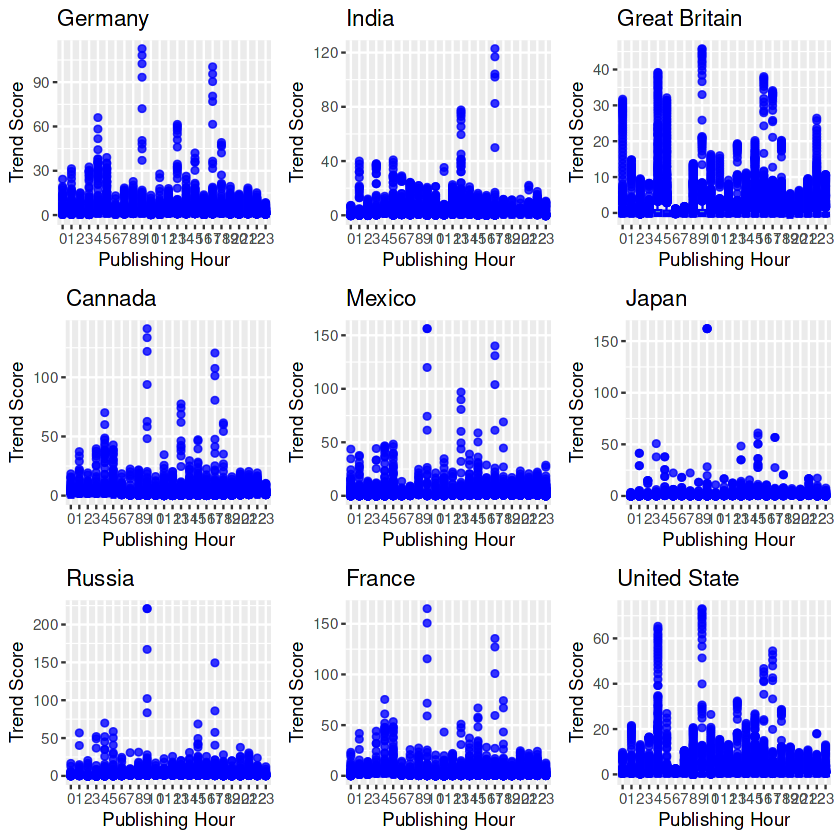

In [92]:

y1 <- ggplot(Germany.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Germany")

y2 <- ggplot(India.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("India")

y3 <- ggplot(GB.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Great Britain")

y4 <- ggplot(Cannada.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Cannada")

y5 <- ggplot(Mexico.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Mexico")

y6 <- ggplot(Japan.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Japan")

y7 <- ggplot(Russia.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("Russia")

y8 <- ggplot(France.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("France")

y9 <- ggplot(US.data, aes(x = factor(hour), y = trend_score)) +
  geom_boxplot(fill = "#69b3a2", color = "blue", alpha = 0.8) +
  labs(x = "Publishing Hour", y = "Trend Score") +
  ggtitle("United State")

grid.arrange(y1,y2,y3,y4,y5,y6,y7,y8,y9, ncol=)


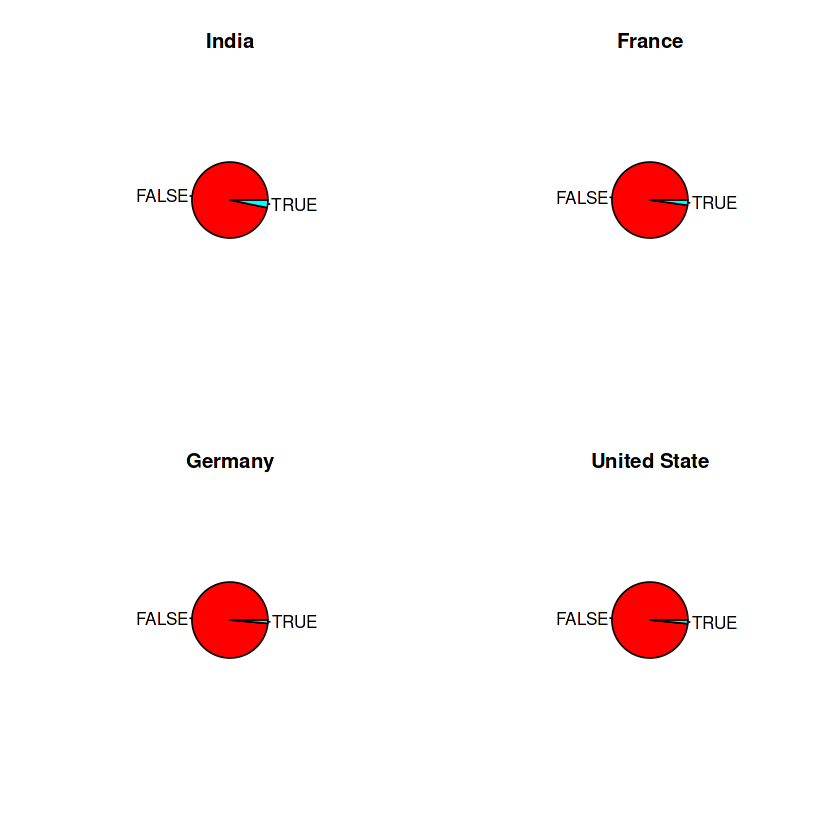

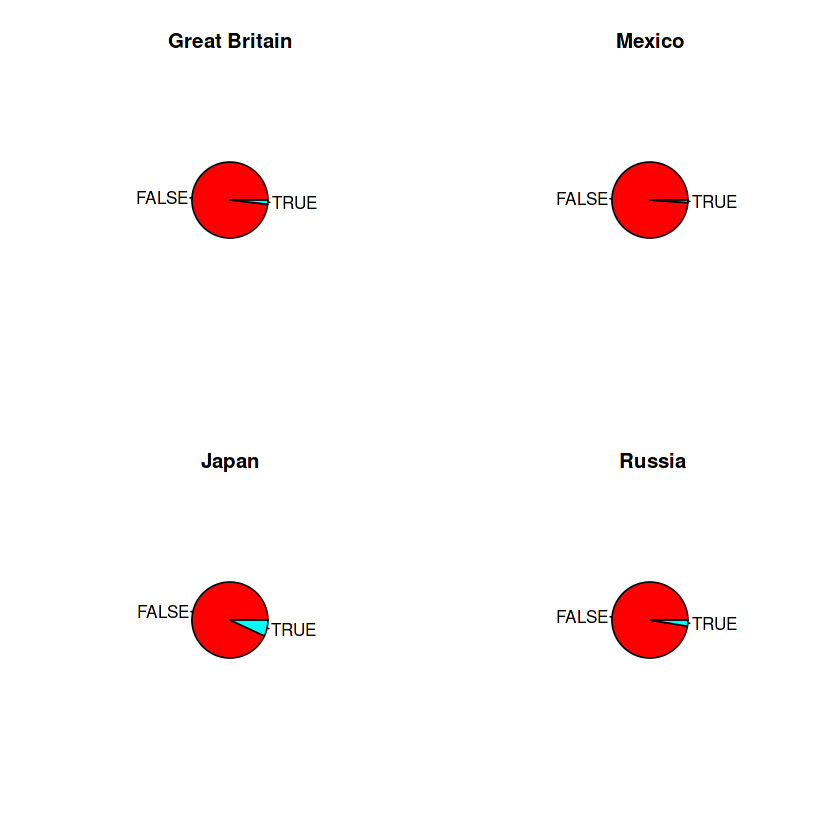

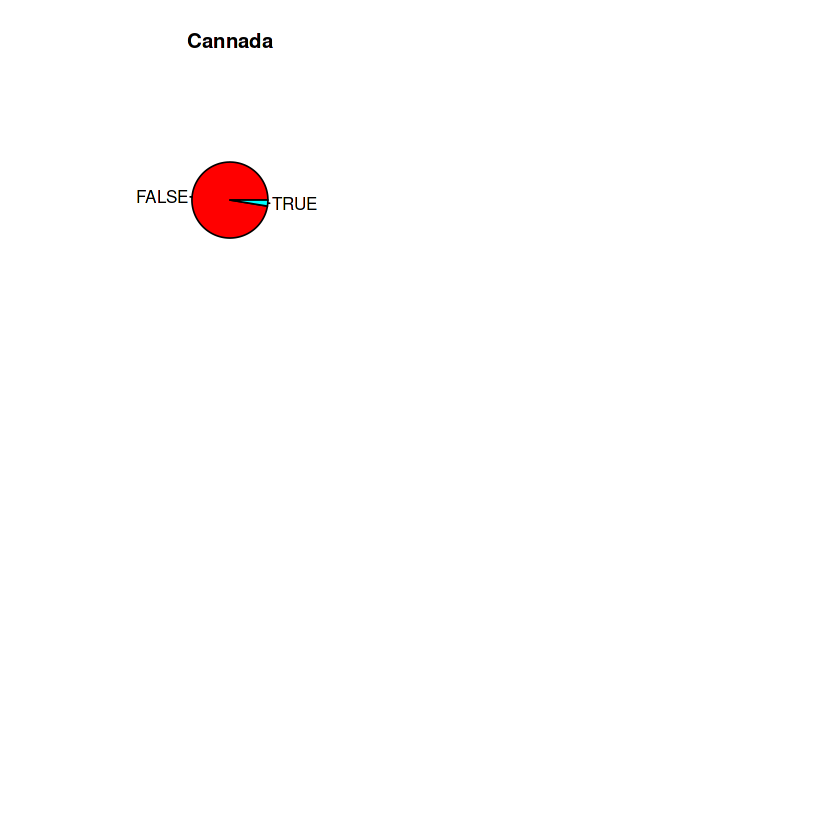

In [93]:
par(mfrow=c(2,2))
plot_comments_disabled <- function(country_data,country_name) {
  pie(table(country_data$comments_disabled), col = rainbow(2),main = paste0(country_name))
}

plot_comments_disabled(India.data,"India")
plot_comments_disabled(France.data,"France")
plot_comments_disabled(Germany.data,"Germany")
plot_comments_disabled(US.data,"United State")
plot_comments_disabled(GB.data, "Great Britain")
plot_comments_disabled(Mexico.data, "Mexico")
plot_comments_disabled(Japan.data, "Japan")
plot_comments_disabled(Russia.data," Russia")
plot_comments_disabled(Cannada.data, "Cannada")

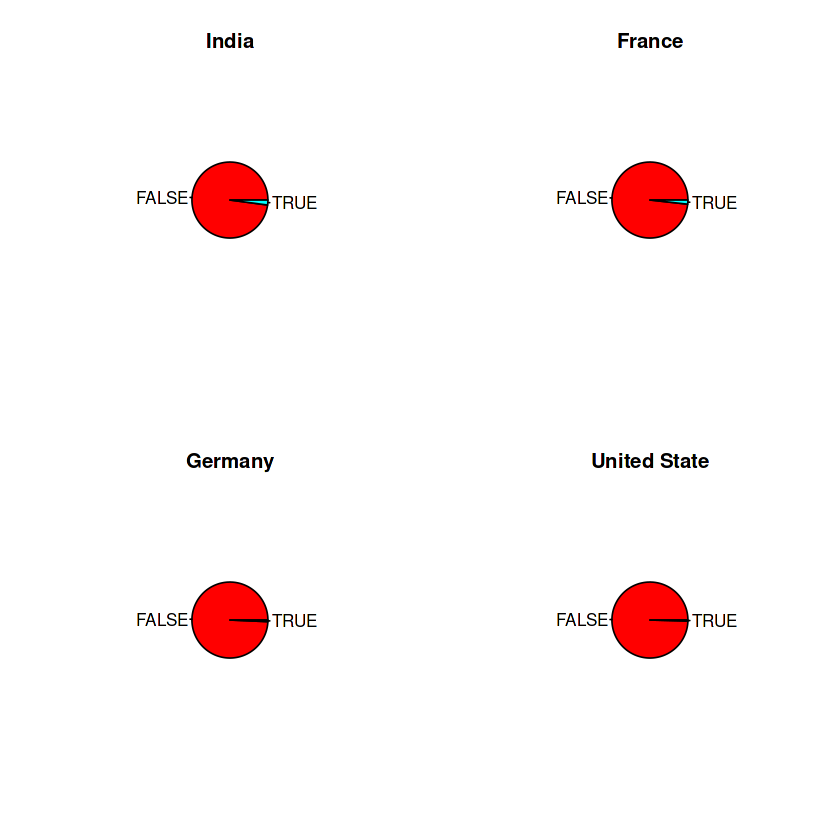

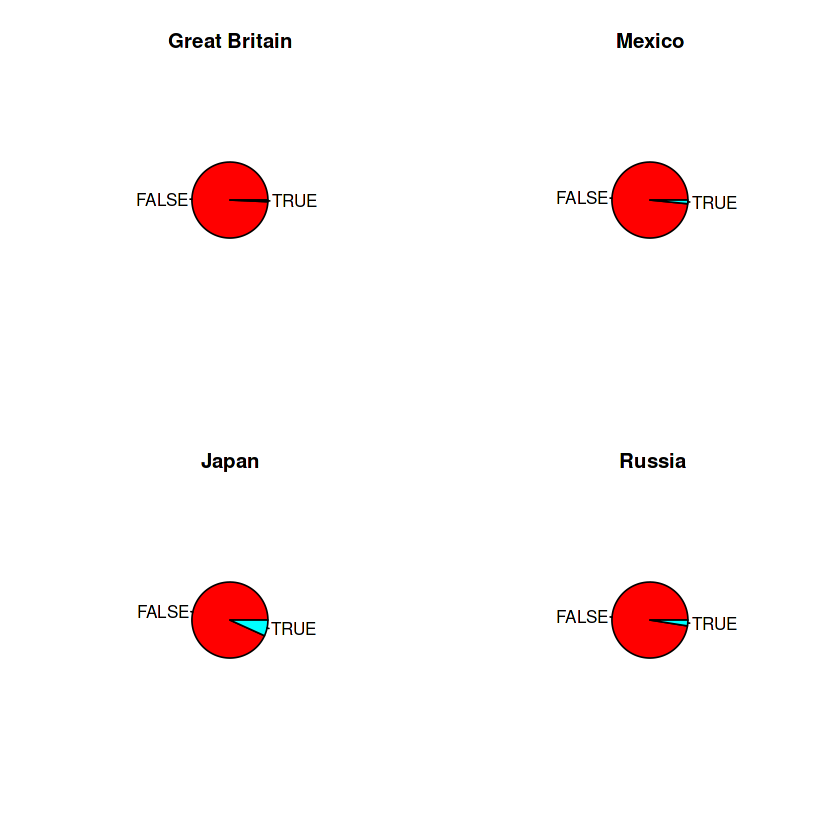

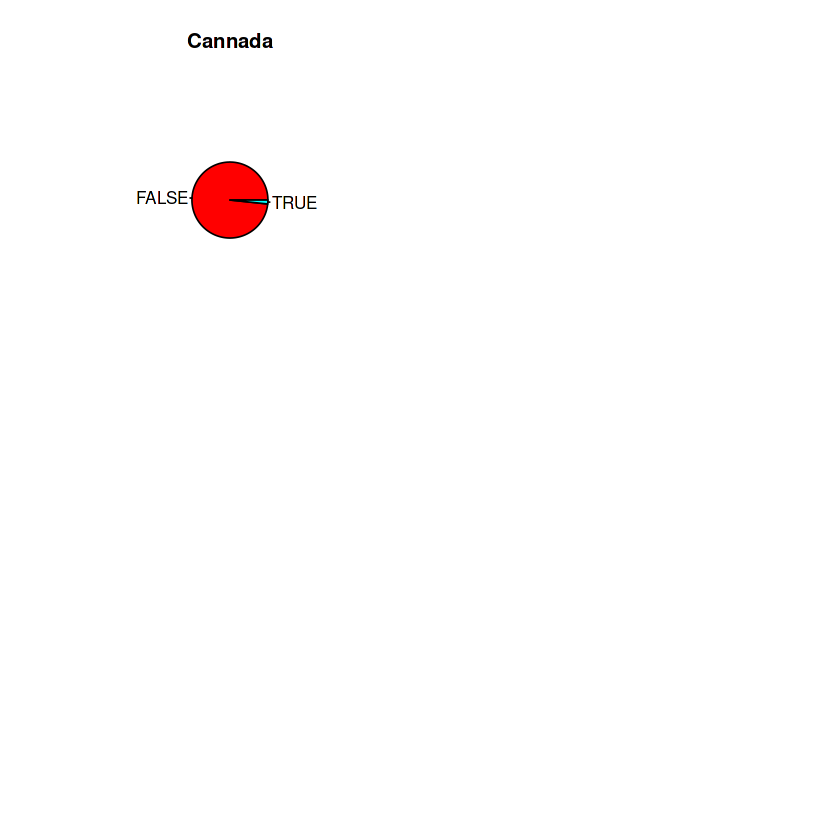

In [94]:
par(mfrow=c(2,2))
plot_ratings_disabled <- function(country_data, country_name) {
  pie(table(country_data$ratings_disabled), col = rainbow(2),main =paste0(country_name))
}


plot_ratings_disabled(India.data,"India")
plot_ratings_disabled(France.data,"France")
plot_ratings_disabled(Germany.data,"Germany")
plot_ratings_disabled(US.data,"United State")
plot_ratings_disabled(GB.data, "Great Britain")
plot_ratings_disabled(Mexico.data, "Mexico")
plot_ratings_disabled(Japan.data, "Japan")
plot_ratings_disabled(Russia.data," Russia")
plot_ratings_disabled(Cannada.data, "Cannada")